<a href="https://colab.research.google.com/github/jon-chun/sentimentarcs/blob/main/sentiment_arcs_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Arcs: Self-Supervising Time Series Sentiment Analysis**

## [MANUAL INPUT] Connect to Google gDrive 

In [1]:
from google.colab import drive

drive.mount('/gdrive')

Mounted at /gdrive


# **Setup and Configuration**

In [2]:
%cd /gdrive/MyDrive/research/2021/sentiment_arcs/

/gdrive/MyDrive/research/2021/sentiment_arcs


In [3]:
!ls

crux				sentiment_arcs
data				sentiment_arcs_cruxes
nlp_sa_dl_novels_20211126.gdoc	sentiment_arcs_dataset
nlp_sa_dl_novels.gdoc		sentiment_arcs_emotions
novels				sentiment_arcs_features
plots				sentiment_arcs_segmentation
sa_time_series_20210912.gdoc


In [4]:
from google.colab import files

In [5]:
# CUSTOMIZE: define subdirectory paths

data_raw_subdir  = './data/sentiments_raw/'
data_clean_subdir  = './data/sentiments_clean/'
plots_subdir = './plots/'
crux_subdir = './crux/'
code_subdir  = './sentiment_arcs/sentiment_arcs/'

## Install Libraries

## Load Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
import re
from datetime import datetime
import glob

In [8]:
plt.rcParams["figure.figsize"]=(20,10)

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [10]:
# [SKIP] to next section

In [11]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
# https://www.statsmodels.org/devel/examples/notebooks/generated/lowess.html
"""
import pylab
import statsmodels.api as sm

sns.set_style("whitegrid")

pylab.rc("figure", figsize=(16, 8))
pylab.rc("font", size=14)
"""

'\nimport pylab\nimport statsmodels.api as sm\n\nsns.set_style("whitegrid")\n\npylab.rc("figure", figsize=(16, 8))\npylab.rc("font", size=14)\n'

## Configure Jupyter Notebook

In [13]:
# Automatically reload changed libraries

# https://switowski.com/blog/ipython-autoreload
# import importlib
# importlib.reload(sentiment_arcs_utils.get_fullpath)

%load_ext autoreload
%autoreload 2

In [14]:
# Ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [15]:
# Configure Jupyter

# Enable multiple outputs from one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display
from ipywidgets import widgets, interactive

# Configure Google Colab

# %load_ext google.colab.data_table

In [16]:
from IPython.display import Image

In [17]:
from google.colab import files

# **Utility Functions**

In [18]:
!pwd

/gdrive/MyDrive/research/2021/sentiment_arcs


In [19]:
!ls

crux				sentiment_arcs
data				sentiment_arcs_cruxes
nlp_sa_dl_novels_20211126.gdoc	sentiment_arcs_dataset
nlp_sa_dl_novels.gdoc		sentiment_arcs_emotions
novels				sentiment_arcs_features
plots				sentiment_arcs_segmentation
sa_time_series_20210912.gdoc


In [20]:
# Add sentiment_arcs.py to the sys path in order to import library

import sys

# sys.path.append('/content/gdrive/mypythondirectory')

sys.path.append('/gdrive/My Drive/research/2021/sentiment_arcs/sentiment_arcs')

sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/gdrive/My Drive/research/2021/sentiment_arcs/sentiment_arcs']

In [21]:
!ls sentiment_arcs/*.py

sentiment_arcs/sentiment_arcs_utils.py


In [22]:
# import importlib

# importlib.reload(get_fullpath)


In [23]:
# %aimport sentiment_arcs_utils

In [24]:
# from sentiment_arcs_utils import get_fullpath

In [25]:
# ??get_fullpath

In [276]:
def get_fullpath( ftype='data_clean', first_note = '',last_note='', plot_ext='png', no_date=False):
  '''
  Given a required file_type(ftype:['data_clean','data_raw','plot']) and
    optional first_note: str inserted after Title and before (optional) SMA/Standardization info
             last_note: str insterted after (optional) SMA/Standardization info and before (optional) timedate stamp
             plot_ext: change default *.png extension of plot file
             no_date: don't add trailing datetime stamp to filename
  Generate and return a fullpath (/subdir/filename.ext) to save file to
  '''

  # String with full path/filename.ext to return
  fname = ''

  # Get current datetime stamp as a string
  if no_date:
    date_dt = ''
  else:
    date_dt = f'_{datetime.now().strftime("%Y_%m_%d-%I_%M_%S_%p")}'

  # Clean optional file notation if passed in
  if first_note:
    fnote_str = first_note.replace(' ', '_')
    fnote_str = '_'.join(fnote_str.split())
    fnote_str = '_'.join(fnote_str.split('.'))
    fnote_str = '_'.join(fnote_str.split('__'))
    fnote_str = fnote_str.lower()

  # Get Current Novel Name and Clean
  novel_title_str = Novel_Title.replace(' ', '_').lower()
  novel_title_str = '_'.join(novel_title_str.split())
  novel_title_str = '_'.join(novel_title_str.split('.'))
  novel_title_str = '_'.join(novel_title_str.split('__'))
  if first_note:
    novel_title_str = f'{novel_title_str}_{first_note}'

  # Option (a): Cleaned Model Data (Smoothed then Standardized)
  if ftype == 'data_clean':
    subdir_path = data_clean_subdir
    fprefix = 'sa_clean_'
    fname_str = f'{subdir_path}{fprefix}{novel_title_str}_{Model_Standardization_Method.lower()}_sma{Window_Percent}'
    if last_note:
      fname = f'{fname_str}_{last_note}{date_dt}.csv'
    else:
      fname = f'{fname_str}{date_dt}.csv'

  # Option (b): Raw Model Data
  elif ftype == 'data_raw':
    subdir_path = data_raw_subdir
    fprefix = 'sa_raw_'
    fname_str = f'{subdir_path}{fprefix}{novel_title_str}'
    if last_note:
      fname = f'{fname_str}_{last_note}{date_dt}.csv'
    else:
      fname = f'{fname_str}{date_dt}.csv'

  # Option (c): Plot Figure
  elif ftype == 'plot':
    subdir_path = plots_subdir
    fprefix = 'plot_'
    fname_str = f'{subdir_path}{fprefix}{novel_title_str}'
    if last_note:
      fname = f'{fname_str}_{last_note}{date_dt}.{plot_ext}'
    else:
      fname = f'{fname_str}{date_dt}.{plot_ext}'

  # Option (d): Crux Text
  elif ftype == 'crux_text':
    subdir_path = plots_subdir
    fprefix = 'crux_'
    fname_str = f'{subdir_path}{fprefix}{novel_title_str}'
    if last_note:
      fname = f'{fname_str}_{last_note}{date_dt}.txt'
    else:
      fname = f'{fname_str}{date_dt}.txt'

  else:
    print(f'ERROR: In get_fullpath() with illegal arg ftype:[{ftype}]')
    return f'ERROR: ftype:[{ftype}]'

  return fname

In [27]:
# Test

# NameError: name 'Novel_Title' is not defined

# get_fullpath(ftype='data_clean', first_note='vader', last_note='anote bnote', plot_ext='png', no_date=True)

# **Select Novels**

## Choose from Preexisting Corpus

In [32]:
novels_dt = {
  'cdickens_christmascarol':['A Christmas Carol by Charles Dickens ',1843,1399],
  'cdickens_greatexpectations':['Great Expectations by Charles Dickens' ,1861, 7230],
  'ddefoe_robinsoncrusoe':['Robinson Crusoe by Daniel Defoe',1719, 2280],
  'emforester_howardsend':['Howards End by E.M. Forester', 1910, 8999],
  'fbaum_wizardofoz':['The Wonderful Wizard of Oz by Frank Baum', 1850, 2238],
  'fdouglass_narrativeofslave':['Narrative of the life of Frederick Douglass, an American Slave by Frederick Douglass', 1845, 1688],
  'fscottfitzerald_greatgatsby':['The Great Gatsby by F. Scott Fitzgerald', 1925, 2950],
  'geliot_middlemarch':['Middlemarch by George Eliot', 1871, 10373],
  'hjames_portraitofalady':['The Portrait of a Lady by Henry James', 1881, 13258],
  'homerwilson_homer':['The Odyssey by Homer (trans Emily Wilson)', 2018, 6814],
  'imcewan_machineslikeme':['Machines Like Me by Ian McEwan', 2019, 6448],
  'jausten_prideandprejudice':['Pride and Prejudice by Jane Austen', 1813, 5891],
  'jconrad_heartofdarkness':['Heart of Darkness by Joseph Conrad', 1902, 1619],
  'jjoyce_portraitoftheartist':['A Portrait of the Artist as a Young Man by James Joyce', 2016, 5584],
  'jkrowling_pottersorcerersstone':['Harry Potter and the Sorcerer’s Stone by J.K. Rowling ', 1997, 5488],
  'mproust_searchoflosttime':['In Search of Lost Time, Vol 3: The Guermantes Way by Marcel Proust', 1920, 8388],
  'mshelly_frankenstein':['Frankenstein by Mary Shelly', 1818, 3282],
  'mtwain_huckleberryfinn':['Huckleberry Finn by Mark Twain', 1884, 5775],
  'staugustine_confessions':['Confessions (Books 1-9) by St. Augustine', 400, 3673],
  'tmorrison_beloved':['Beloved by Toni Morrison', 1987, 7102],
  'vnabokov_palefire':['Pale Fire by Viktor Nabokov', 1962, 2984],
  'vwoolf_mrsdalloway':['Mrs. Dalloway by Virginia Woolf', 1925, 3647],
  'vwoolf_orlando':['Orlando by Virginia Woolf', 1928, 2,992],
  'vwoolf_thewaves':['The Waves by Virginia Woolf', 1931, 3919],
  'vwoolf_tothelighthouse':['To The Lighthouse by Virginia Woolf', 1927, 3403],
}

In [33]:
# Derive List of Novel a)keys and b)full author and titles

novels_corpus_ls = list(novels_dt.keys())
print(f'\nNovel Columns:')
for akey in novels_corpus_ls:
  print(f'  {akey}')
print('\n')

print(f'\nNovel Titles:')
novels_full_ls = [x[0] for x in list(novels_dt.values())]
for akey in novels_full_ls:
  print(f'  {akey}')
  
"""
# Derive List of Novel a)keys and b)full author and titles

novels_key_ls = list(novels_dt.keys())
novels_key_ls

novels_full_ls = [x[0] for x in list(novels_dt.values())]

for akey in novels_full_ls:
  print(akey)
""";


Novel Columns:
  cdickens_christmascarol
  cdickens_greatexpectations
  ddefoe_robinsoncrusoe
  emforester_howardsend
  fbaum_wizardofoz
  fdouglass_narrativeofslave
  fscottfitzerald_greatgatsby
  geliot_middlemarch
  hjames_portraitofalady
  homerwilson_homer
  imcewan_machineslikeme
  jausten_prideandprejudice
  jconrad_heartofdarkness
  jjoyce_portraitoftheartist
  jkrowling_pottersorcerersstone
  mproust_searchoflosttime
  mshelly_frankenstein
  mtwain_huckleberryfinn
  staugustine_confessions
  tmorrison_beloved
  vnabokov_palefire
  vwoolf_mrsdalloway
  vwoolf_orlando
  vwoolf_thewaves
  vwoolf_tothelighthouse



Novel Titles:
  A Christmas Carol by Charles Dickens 
  Great Expectations by Charles Dickens
  Robinson Crusoe by Daniel Defoe
  Howards End by E.M. Forester
  The Wonderful Wizard of Oz by Frank Baum
  Narrative of the life of Frederick Douglass, an American Slave by Frederick Douglass
  The Great Gatsby by F. Scott Fitzgerald
  Middlemarch by George Eliot
  The Port

In [34]:
#@title CORPORA: Select Which Novel(s) you want to Analyze:

cdickens_christmascarol = False #@param {type:"boolean"}
cdickens_greatexpectations = False #@param {type:"boolean"}
ddefoe_robinsoncrusoe = False #@param {type:"boolean"}
emforester_howardsend = False #@param {type:"boolean"}
fbaum_wizardofoz = False #@param {type:"boolean"}
fdouglass_narrativeofslave = False #@param {type:"boolean"}
fscottfitzerald_greatgatsby = False #@param {type:"boolean"}
geliot_middlemarch = False #@param {type:"boolean"}
hjames_portraitofalady = False #@param {type:"boolean"}
homerwilson_homer = False #@param {type:"boolean"}
imcewan_machineslikeme = False #@param {type:"boolean"}
jausten_prideandprejudice = False #@param {type:"boolean"}
jconrad_heartofdarkness = False #@param {type:"boolean"}
jjoyce_portraitoftheartist = False #@param {type:"boolean"}
jkrowling_pottersorcerersstone = False #@param {type:"boolean"}
mproust_searchoflosttime = False #@param {type:"boolean"}
mshelly_frankenstein = False #@param {type:"boolean"}
mtwain_huckleberryfinn = False #@param {type:"boolean"}
staugustine_confessions = False #@param {type:"boolean"}
tmorrison_beloved = False #@param {type:"boolean"}
vnabokov_palefire = False #@param {type:"boolean"}
vwoolf_mrsdalloway = True #@param {type:"boolean"}
vwoolf_orlando = True #@param {type:"boolean"}
vwoolf_thewaves = True #@param {type:"boolean"}
vwoolf_tothelighthouse = True #@param {type:"boolean"}

novels_subcorpus_ls = []

if cdickens_christmascarol:
  novels_subcorpus_ls.append('cdickens_christmascarol')
if cdickens_greatexpectations: 
  novels_subcorpus_ls.append('cdickens_greatexpectations')
if ddefoe_robinsoncrusoe:
  novels_subcorpus_ls.append('ddefoe_robinsoncrusoe')
if emforester_howardsend:
  novels_subcorpus_ls.append('emforester_howardsend')
if fbaum_wizardofoz:
  novels_subcorpus_ls.append('fbaum_wizardofoz')
if fdouglass_narrativeofslave:
  novels_subcorpus_ls.append('fdouglass_narrativeofslave')
if fscottfitzerald_greatgatsby:
  novels_subcorpus_ls.append('fscottfitzerald_greatgatsby')
if geliot_middlemarch:
  novels_subcorpus_ls.append('geliot_middlemarch')
if hjames_portraitofalady:
  novels_subcorpus_ls.append('hjames_portraitofalady')
if homerwilson_homer:
  novels_subcorpus_ls.append('homerwilson_homer')
if imcewan_machineslikeme:
  novels_subcorpus_ls.append('imcewan_machineslikeme')
if jausten_prideandprejudice:
  novels_subcorpus_ls.append('jausten_prideandprejudice')
if jconrad_heartofdarkness:
  novels_subcorpus_ls.append('jconrad_heartofdarkness')
if jjoyce_portraitoftheartist:
  novels_subcorpus_ls.append('jjoyce_portraitoftheartist')
if jkrowling_pottersorcerersstone:
  novels_subcorpus_ls.append('jkrowling_pottersorcerersstone')
if mproust_searchoflosttime:
  novels_subcorpus_ls.append('mproust_searchoflosttime')
if mshelly_frankenstein:
  novels_subcorpus_ls.append('mshelly_frankenstein')
if mtwain_huckleberryfinn:
  novels_subcorpus_ls.append('mtwain_huckleberryfinn')
if staugustine_confessions:
  novels_subcorpus_ls.append('staugustine_confessions')
if tmorrison_beloved:
  novels_subcorpus_ls.append('tmorrison_beloved')
if vnabokov_palefire:
  novels_subcorpus_ls.append('vnabokov_palefire')
if vwoolf_mrsdalloway:
  novels_subcorpus_ls.append('vwoolf_mrsdalloway')
if vwoolf_orlando:
  novels_subcorpus_ls.append('vwoolf_orlando')
if vwoolf_thewaves:
  novels_subcorpus_ls.append('vwoolf_thewaves')
if vwoolf_tothelighthouse:
  novels_subcorpus_ls.append('vwoolf_tothelighthouse')


In [35]:
# Confirm Novel Selection(s)

# novels_subcorpus_ls = []
print(f'Confirm these are the Novels you want to analyze:\n')

for i, anovel in enumerate(novels_subcorpus_ls):
  print(f'  Novel #{i}: {novels_dt[anovel][0]} ({novels_dt[anovel][2]})')
  # novels_corpus_ls.append(anovel)

print('\nIf there is an error, go back and rerun the previous code cell.')

Confirm these are the Novels you want to analyze:

  Novel #0: Mrs. Dalloway by Virginia Woolf (3647)
  Novel #1: Orlando by Virginia Woolf (2)
  Novel #2: The Waves by Virginia Woolf (3919)
  Novel #3: To The Lighthouse by Virginia Woolf (3403)

If there is an error, go back and rerun the previous code cell.


In [271]:
#@title Enter ONE Novel to Focus On:

Novel_Key = "vwoolf_tothelighthouse" #@param {type:"string"}

# novels_ls = [Novel_Key]

# Novel_Title = novels_dt[novels_ls[0]]
# Novel_Title 

Novel_Title = novels_dt[Novel_Key][0]

novel_focus_str = Novel_Key

Novel_Title

'To The Lighthouse by Virginia Woolf'

## Review Summary of Selected Novel(s)

In [37]:
# Review Summary of Novel Selections (at Corpus, SubCorpus and Individual Levels):

print(f'\nCorpus: All {len(novels_corpus_ls)} Novels (novels_corpus_ls):')
for i, anovel in enumerate(novels_corpus_ls):
  print(f'  Novel #{i}: {anovel}')

print(f'\nSubCorpus: Only {len(novels_subcorpus_ls)} Selected Novels (novels_subcorpus_ls):')
for i,anovel in enumerate(novels_subcorpus_ls):
  print(f'  Novel #{i}: {anovel}')

print(f'\nFocus: One Novel to Focus On (novels_focus_str):')
print(f'  {novel_focus_str}')


Corpus: All 25 Novels (novels_corpus_ls):
  Novel #0: cdickens_christmascarol
  Novel #1: cdickens_greatexpectations
  Novel #2: ddefoe_robinsoncrusoe
  Novel #3: emforester_howardsend
  Novel #4: fbaum_wizardofoz
  Novel #5: fdouglass_narrativeofslave
  Novel #6: fscottfitzerald_greatgatsby
  Novel #7: geliot_middlemarch
  Novel #8: hjames_portraitofalady
  Novel #9: homerwilson_homer
  Novel #10: imcewan_machineslikeme
  Novel #11: jausten_prideandprejudice
  Novel #12: jconrad_heartofdarkness
  Novel #13: jjoyce_portraitoftheartist
  Novel #14: jkrowling_pottersorcerersstone
  Novel #15: mproust_searchoflosttime
  Novel #16: mshelly_frankenstein
  Novel #17: mtwain_huckleberryfinn
  Novel #18: staugustine_confessions
  Novel #19: tmorrison_beloved
  Novel #20: vnabokov_palefire
  Novel #21: vwoolf_mrsdalloway
  Novel #22: vwoolf_orlando
  Novel #23: vwoolf_thewaves
  Novel #24: vwoolf_tothelighthouse

SubCorpus: Only 4 Selected Novels (novels_subcorpus_ls):
  Novel #0: vwoolf_mrsda

## Upload New Novel

In [ ]:
# TODO: Coming feature

# **Select Models**

In [38]:
# Standardize model/column names when reading from other sources

cols_map_dt = {'syuzhet':'syuzhetr',
               'huliu':'bing_sentimentr',
               'sentiword':'sentiword_sentimentr',
               'senticnet':'senticnet_sentimentr',
               'lmcd':'lmcd_sentimentr',
               'jockers':'jockers_sentimentr',
               'jockers_rinker':'jockersrinker_sentimentr'
               }

cols_missing_ls = ['nrc_sentimentr']

In [39]:
models_dt = {
    # Lexicon
    'SyuzhetR_AFINN':['afinn', 'lexicon', 2477],
    'SyuzhetR_Bing':['bing', 'lexicon', 5469],
    'SyuzhetR_NRC':['nrc', 'lexicon', 5468],
    'SyuzhetR_SyuzhetR':['syuzhetr', 'lexicon', 10748],
    'SentimentR_SentimentR':['sentimentr', 'lexicon', 11710],
    'Pattern':['pattern', 'lexicon', 2918],

    # Heuristic
    'VADER':['vader', 'heuristic', 7520],
    'SentimentR_Bing':['bing_sentimentr', 'heuristic', 5469],
    # 'SentimentR_NRC':['nrc_sentimentr', 'heuristic', 5469],
    'SentimentR_SentiWord':['sentiword_sentimentr', 'heuristic', 20093],
    'SentimentR_SenticNet':['senticnet_sentimentr', 'heuristic', 23626],
    'SentimentR_LMcD':['lmcd_sentimentr', 'heuristic', 4150],
    'SentimentR_Jockers':['jockers_sentimentr', 'heuristic', 10748],
    'SentimentR_JockersRinker':['jockersrinker_sentimentr', 'heuristic', 11710],

    # Traditional ML 
    'Logistic_Regression':['logreg', 'tradml', 'scikit'],
    'Logistic_Regression_CV':['logreg_cv', 'tradml', 'scikit'],
    'Multinomial_Naive_Bayes':['multinb', 'tradml', 'scikit'],
    'TextBlob':['textblob', 'tradml', 'textblob'],
    'Random_Forest':['rf', 'tradml', 'scikit'],
    'XGBoost':['xgb', 'tradml', 'xgboost'],
    'FLAML_AutoML':['flaml', 'tradml', 'flaml'],
    'AutoGluon_Text':['autogluon', 'tradml', 'autogluon_text'],

    # DNN
    'Fully_Connected_Network':['fcn', 'dnn', 6287671],
    'LSTM_DNN':['lstm', 'dnn', 7109089],
    'CNN_DNN':['cnn', 'dnn', 1315937],
    'Multilingual_CNN_Stanza_AutoML':['stanza', 'dnn', 0],
    'HyperOpt_CNN_Flair_AutoML':['flair', 'dnn', 0],

    # Transformer
    'Distilled_BERT':['huggingface', 'transformer', 'bert'],
    'T5_IMDB':['t5imdb50k', 'transformer', 't5'],
    'BERT_Dual_Coding':['hinglish', 'transformer', 'bert'],
    'BERT_Yelp':['yelp', 'transformer', 'bert'],
    'BERT_2IMDB':['imdb2way', 'transformer', 'bert'],
    'BERT_Multilingual':['nlptown', 'transformer', 'bert'],
    'RoBERTa_XML_8Language':['robertaxml8lang', 'transformer', 'roberta'],
    'RoBERTa_Large_15DB':['roberta15lg', 'transformer', 'roberta'],

}

In [40]:
# Convenience lists for each type of model

# Lexicon Models
models_lexicon_ls = [x[0] for x in models_dt.values() if x[1] == 'lexicon']
print(f'\nThere are {len(models_lexicon_ls)} Lexicon Models')
for i,amodel in enumerate(models_lexicon_ls):
  print(f'  Lexicon Model #{i}: {amodel}')

# Heuristic Models
models_heuristic_ls = [x[0] for x in models_dt.values() if x[1] == 'heuristic']
print(f'\nThere are {len(models_heuristic_ls)} Heuristic Models')
for i,amodel in enumerate(models_heuristic_ls):
  print(f'  Heuristic Model #{i}: {amodel}')

# Traditional ML Models
models_tradml_ls = [x[0] for x in models_dt.values() if x[1] == 'tradml']
print(f'\nThere are {len(models_tradml_ls)} Traditional ML Models')
for i,amodel in enumerate(models_tradml_ls):
  print(f'  Traditional ML Model #{i}: {amodel}')

# DNN Models
models_dnn_ls = [x[0] for x in models_dt.values() if x[1] == 'dnn']
print(f'\nThere are {len(models_dnn_ls)} DNN Models')
for i,amodel in enumerate(models_dnn_ls):
  print(f'  DNN Model #{i}: {amodel}')

# Transformer Models
models_transformer_ls = [x[0] for x in models_dt.values() if x[1] == 'transformer']
print(f'\nThere are {len(models_transformer_ls)} Transformer Models')
for i,amodel in enumerate(models_transformer_ls):
  print(f'  Transformer Model #{i}: {amodel}')

# All Models

"""
models_all_ls = models_lexicon_ls + models_heuristic_ls + models_tradml_ls + models_dnn_ls + models_transformer_ls

print(f'\nThere are {len(cols_models_ls)} Total Models:')
for i,amodel in enumerate(cols_models_ls):
  print(f'  Model #{i:>2}: {amodel}')
""";

models_ensemble_ls = models_lexicon_ls + models_heuristic_ls + models_tradml_ls + models_dnn_ls + models_transformer_ls

print(f'\nThere are {len(models_ensemble_ls)} Total Models:')
for i,amodel in enumerate(models_ensemble_ls):
  print(f'  Model #{i:>2}: {amodel}')

print(f'\nThere are {len(models_ensemble_ls)} Total Models (+1 for Ensemble Median)')



There are 6 Lexicon Models
  Lexicon Model #0: afinn
  Lexicon Model #1: bing
  Lexicon Model #2: nrc
  Lexicon Model #3: syuzhetr
  Lexicon Model #4: sentimentr
  Lexicon Model #5: pattern

There are 7 Heuristic Models
  Heuristic Model #0: vader
  Heuristic Model #1: bing_sentimentr
  Heuristic Model #2: sentiword_sentimentr
  Heuristic Model #3: senticnet_sentimentr
  Heuristic Model #4: lmcd_sentimentr
  Heuristic Model #5: jockers_sentimentr
  Heuristic Model #6: jockersrinker_sentimentr

There are 8 Traditional ML Models
  Traditional ML Model #0: logreg
  Traditional ML Model #1: logreg_cv
  Traditional ML Model #2: multinb
  Traditional ML Model #3: textblob
  Traditional ML Model #4: rf
  Traditional ML Model #5: xgb
  Traditional ML Model #6: flaml
  Traditional ML Model #7: autogluon

There are 5 DNN Models
  DNN Model #0: fcn
  DNN Model #1: lstm
  DNN Model #2: cnn
  DNN Model #3: stanza
  DNN Model #4: flair

There are 8 Transformer Models
  Transformer Model #0: hugging

"\nmodels_all_ls = models_lexicon_ls + models_heuristic_ls + models_tradml_ls + models_dnn_ls + models_transformer_ls\n\nprint(f'\nThere are {len(cols_models_ls)} Total Models:')\nfor i,amodel in enumerate(cols_models_ls):\n  print(f'  Model #{i:>2}: {amodel}')\n"


There are 34 Total Models:
  Model # 0: afinn
  Model # 1: bing
  Model # 2: nrc
  Model # 3: syuzhetr
  Model # 4: sentimentr
  Model # 5: pattern
  Model # 6: vader
  Model # 7: bing_sentimentr
  Model # 8: sentiword_sentimentr
  Model # 9: senticnet_sentimentr
  Model #10: lmcd_sentimentr
  Model #11: jockers_sentimentr
  Model #12: jockersrinker_sentimentr
  Model #13: logreg
  Model #14: logreg_cv
  Model #15: multinb
  Model #16: textblob
  Model #17: rf
  Model #18: xgb
  Model #19: flaml
  Model #20: autogluon
  Model #21: fcn
  Model #22: lstm
  Model #23: cnn
  Model #24: stanza
  Model #25: flair
  Model #26: huggingface
  Model #27: t5imdb50k
  Model #28: hinglish
  Model #29: yelp
  Model #30: imdb2way
  Model #31: nlptown
  Model #32: robertaxml8lang
  Model #33: roberta15lg

There are 34 Total Models (+1 for Ensemble Median)


## Lexical Models

In [41]:
#@title Select Lexical Model(s) to Include in Ensemble:

SyzuhetR_AFINN = True #@param {type:"boolean"}
SyuzhetR_Bing = False #@param {type:"boolean"}
SyuzhetR_NRC = True #@param {type:"boolean"}
SyuzhetR_SyuzhetR = True #@param {type:"boolean"}
SentimentR_SentimentR = False #@param {type:"boolean"}
Pattern = False #@param {type:"boolean"}


ensemble_lexicon_ls = []

if SyzuhetR_AFINN:
  ensemble_lexicon_ls.append('SyuzhetR_AFINN')
if SyuzhetR_Bing:
  ensemble_lexicon_ls.append('SyuzhetR_Bing')
if SyuzhetR_NRC:
  ensemble_lexicon_ls.append('SyuzhetR_NRC')
if SyuzhetR_SyuzhetR:
  ensemble_lexicon_ls.append('SyuzhetR_SyuzhetR')
if SentimentR_SentimentR:
  ensemble_lexicon_ls.append('SentimentR_SentimentR')
if Pattern:
  ensemble_lexicon_ls.append('Pattern')


ensemble_lexicon_ls

['SyuzhetR_AFINN', 'SyuzhetR_NRC', 'SyuzhetR_SyuzhetR']

In [42]:
# Confirm Lexicon Model Selection(s)

print(f'Confirm these are the Lexicon Model(s) to include in the Ensemble:\n')

for i, amodel in enumerate(ensemble_lexicon_ls):
  print(f'  Model #{i}: {models_dt[amodel][0]}')

print('\nIf there is an error, go back and rerun the previous code cell.')

Confirm these are the Lexicon Model(s) to include in the Ensemble:

  Model #0: afinn
  Model #1: nrc
  Model #2: syuzhetr

If there is an error, go back and rerun the previous code cell.


## Heuristic Models

In [43]:
"""
for amodel in [x for x in models_dt.keys() if models_dt[x][1] == 'heuristic']:
  print(amodel)
""";

In [44]:
"""
for amodel in models_heuristic_ls:
  print(amodel)
""";

In [45]:
#@title Select Heuristic Model(s) to Include in Ensemble:

VADER = True #@param {type:"boolean"}
SentimentR_Bing = False #@param {type:"boolean"}
# SentimentR_NRC = True #@param {type:"boolean"}
SentimentR_SentiWord = False #@param {type:"boolean"}
SentimentR_SenticNet = False #@param {type:"boolean"}
SentimentR_LMcD = False #@param {type:"boolean"}
SentimentR_Jockers = False #@param {type:"boolean"}
SentimentR_JockersRinker = True #@param {type:"boolean"}


ensemble_heuristic_ls = []

if VADER:
  ensemble_heuristic_ls.append('VADER')
if SentimentR_Bing:
  ensemble_heuristic_ls.append('SentimentR_Bing')

# if SentimentR_NRC:
#   ensemble_heuristic_ls.append('SentimentR_NRC')

if SentimentR_SentiWord:
  ensemble_heuristic_ls.append('SentimentR_SentiWord')
if SentimentR_SenticNet:
  ensemble_heuristic_ls.append('SentimentR_SenticNet')
if SentimentR_LMcD:
  ensemble_heuristic_ls.append('SentimentR_LMcD')
if SentimentR_Jockers:
  ensemble_heuristic_ls.append('SentimentR_Jockers')
if SentimentR_JockersRinker:
  ensemble_heuristic_ls.append('SentimentR_JockersRinker')

ensemble_heuristic_ls

['VADER', 'SentimentR_JockersRinker']

In [46]:
# Confirm Heuristic Model Selection(s)

print(f'Confirm these are the Heuristic Model(s) to include in the Ensemble:\n')

for i, amodel in enumerate(ensemble_heuristic_ls):
  print(f'  Model #{i}: {models_dt[amodel][0]}')

print('\nIf there is an error, go back and rerun the previous code cell.')

Confirm these are the Heuristic Model(s) to include in the Ensemble:

  Model #0: vader
  Model #1: jockersrinker_sentimentr

If there is an error, go back and rerun the previous code cell.


## Traditional ML Models

In [47]:
"""
for amodel in [x for x in models_dt.keys() if models_dt[x][1] == 'tradml']:
  print(amodel)
""";

In [48]:
"""
for amodel in models_tradml_ls:
  print(amodel)
""";

In [49]:
#@title Select Heuristic Model(s) to Include in Ensemble:

Logistic_Regression = True #@param {type:"boolean"}
Logistic_Regression_CV6 = False #@param {type:"boolean"}
Multinomial_Naive_Bayes = False #@param {type:"boolean"}
TextBlob = True #@param {type:"boolean"}
Random_Forest = False #@param {type:"boolean"}
XGBoost = True #@param {type:"boolean"}
FLAML_AutoML = True #@param {type:"boolean"}
AutoGluon_Text = True #@param {type:"boolean"}


ensemble_tradml_ls = []

if Logistic_Regression:
  ensemble_tradml_ls.append('Logistic_Regression')
if Logistic_Regression_CV6:
  ensemble_tradml_ls.append('Logistic_Regression_CV')
if Multinomial_Naive_Bayes:
  ensemble_tradml_ls.append('Multinomial_Naive_Bayes')
if TextBlob:
  ensemble_tradml_ls.append('TextBlob')
if Random_Forest:
  ensemble_tradml_ls.append('Random_Forest')
if XGBoost:
  ensemble_tradml_ls.append('XGBoost')
if FLAML_AutoML:
  ensemble_tradml_ls.append('FLAML_AutoML')
if AutoGluon_Text:
  ensemble_tradml_ls.append('AutoGluon_Text')

ensemble_tradml_ls

['Logistic_Regression',
 'TextBlob',
 'XGBoost',
 'FLAML_AutoML',
 'AutoGluon_Text']

In [50]:
# Confirm Traditional ML Model Selection(s)

print(f'Confirm these are the Traditional ML Model(s) to include in the Ensemble:\n')

for i, amodel in enumerate(ensemble_tradml_ls):
  print(f'  Model #{i}: {models_dt[amodel][0]}')

print('\nIf there is an error, go back and rerun the previous code cell.')

Confirm these are the Traditional ML Model(s) to include in the Ensemble:

  Model #0: logreg
  Model #1: textblob
  Model #2: xgb
  Model #3: flaml
  Model #4: autogluon

If there is an error, go back and rerun the previous code cell.


## DNN Models

In [51]:
"""
for amodel in [x for x in models_dt.keys() if models_dt[x][1] == 'dnn']:
  print(amodel)
""";

In [52]:
"""
for amodel in models_dnn_ls:
  print(amodel)
""";

In [53]:
#@title Select Heuristic Model(s) to Include in Ensemble:

Fully_Connected_Network = True #@param {type:"boolean"}
LSTM_DNN = False #@param {type:"boolean"}
CNN_DNN = False #@param {type:"boolean"}
Multilingual_CNN_Stanza_AutoML = True #@param {type:"boolean"}
HyperOpt_CNN_Flair_AutoML = True #@param {type:"boolean"}


ensemble_dnn_ls = []

if Fully_Connected_Network:
  ensemble_dnn_ls.append('Fully_Connected_Network')
if LSTM_DNN:
  ensemble_dnn_ls.append('LSTM_DNN')
if CNN_DNN:
  ensemble_dnn_ls.append('CNN_DNN')
if Multilingual_CNN_Stanza_AutoML:
  ensemble_dnn_ls.append('Multilingual_CNN_Stanza_AutoML')
if HyperOpt_CNN_Flair_AutoML:
  ensemble_dnn_ls.append('HyperOpt_CNN_Flair_AutoML')

ensemble_dnn_ls

['Fully_Connected_Network',
 'Multilingual_CNN_Stanza_AutoML',
 'HyperOpt_CNN_Flair_AutoML']

In [54]:
# Confirm DNN Model Selection(s)

print(f'Confirm these are the DNN Model(s) to include in the Ensemble:\n')

for i, amodel in enumerate(ensemble_dnn_ls):
  print(f'  Model #{i}: {models_dt[amodel][0]}')

print('\nIf there is an error, go back and rerun the previous code cell.')

Confirm these are the DNN Model(s) to include in the Ensemble:

  Model #0: fcn
  Model #1: stanza
  Model #2: flair

If there is an error, go back and rerun the previous code cell.


## Transformer Models

In [55]:
"""
for amodel in [x for x in models_dt.keys() if models_dt[x][1] == 'transformer']:
  print(amodel)
""";

In [56]:
"""
for amodel in models_transformer_ls:
  print(amodel)
""";

In [57]:
#@title Select Heuristic Model(s) to Include in Ensemble:

Distilled_BERT = True #@param {type:"boolean"}
T5_IMDB = True #@param {type:"boolean"}
BERT_Dual_Coding = False #@param {type:"boolean"}
BERT_Yelp = False #@param {type:"boolean"}
BERT_2IMDB = False #@param {type:"boolean"}
BERT_Multilingual = False #@param {type:"boolean"}
RoBERTa_XML_8Language = True #@param {type:"boolean"}
RoBERTa_Large_15DB = True #@param {type:"boolean"}


ensemble_transformer_ls = []

if Distilled_BERT:
  ensemble_transformer_ls.append('Distilled_BERT')
if T5_IMDB:
  ensemble_transformer_ls.append('T5_IMDB')
if BERT_Dual_Coding:
  ensemble_transformer_ls.append('BERT_Dual_Coding')
if BERT_Yelp:
  ensemble_transformer_ls.append('BERT_Yelp')
if BERT_2IMDB:
  ensemble_transformer_ls.append('BERT_2IMDB')
if BERT_Multilingual:
  ensemble_transformer_ls.append('BERT_Multilingual')
if RoBERTa_XML_8Language:
  ensemble_transformer_ls.append('RoBERTa_XML_8Language')
if RoBERTa_Large_15DB:
  ensemble_transformer_ls.append('RoBERTa_Large_15DB')

ensemble_transformer_ls

['Distilled_BERT', 'T5_IMDB', 'RoBERTa_XML_8Language', 'RoBERTa_Large_15DB']

In [58]:
# Confirm Transformer Model Selection(s)

print(f'Confirm these are the Transformer Model(s) to include in the Ensemble:\n')

for i, amodel in enumerate(ensemble_transformer_ls):
  print(f'  Model #{i}: {models_dt[amodel][0]}')

print('\nIf there is an error, go back and rerun the previous code cell.')

Confirm these are the Transformer Model(s) to include in the Ensemble:

  Model #0: huggingface
  Model #1: t5imdb50k
  Model #2: robertaxml8lang
  Model #3: roberta15lg

If there is an error, go back and rerun the previous code cell.


In [130]:
# Get list of subensemble models

# List of model names (key for indexing into models_dt and col names of ensemble_df)
models_subensemble_ls = []

# List of model titles (for print)
models_ensemble_title_ls = ensemble_lexicon_ls + ensemble_heuristic_ls + ensemble_tradml_ls + \
              ensemble_dnn_ls + ensemble_transformer_ls

print(f'Confirm these are the all the Model(s) to include in the SubEnsemble:\n')

for i, amodel in enumerate(models_ensemble_title_ls):
  print(f'  Model #{i}: {amodel} ({models_dt[amodel][1]}: {models_dt[amodel][0]})')
  models_subensemble_ls.append(models_dt[amodel][0])

print(f'\nIf there is an error in these {len(models_subensemble_ls)} models (+1 for SubEnsemble Median), \n go back and rerun the previous code cells.')

Confirm these are the all the Model(s) to include in the SubEnsemble:

  Model #0: SyuzhetR_AFINN (lexicon: afinn)
  Model #1: SyuzhetR_NRC (lexicon: nrc)
  Model #2: SyuzhetR_SyuzhetR (lexicon: syuzhetr)
  Model #3: VADER (heuristic: vader)
  Model #4: SentimentR_JockersRinker (heuristic: jockersrinker_sentimentr)
  Model #5: Logistic_Regression (tradml: logreg)
  Model #6: TextBlob (tradml: textblob)
  Model #7: XGBoost (tradml: xgb)
  Model #8: FLAML_AutoML (tradml: flaml)
  Model #9: AutoGluon_Text (tradml: autogluon)
  Model #10: Fully_Connected_Network (dnn: fcn)
  Model #11: Multilingual_CNN_Stanza_AutoML (dnn: stanza)
  Model #12: HyperOpt_CNN_Flair_AutoML (dnn: flair)
  Model #13: Distilled_BERT (transformer: huggingface)
  Model #14: T5_IMDB (transformer: t5imdb50k)
  Model #15: RoBERTa_XML_8Language (transformer: robertaxml8lang)
  Model #16: RoBERTa_Large_15DB (transformer: roberta15lg)

If there is an error in these 17 models (+1 for SubEnsemble Median), 
 go back and reru

In [131]:
models_subensemble_ls

['afinn',
 'nrc',
 'syuzhetr',
 'vader',
 'jockersrinker_sentimentr',
 'logreg',
 'textblob',
 'xgb',
 'flaml',
 'autogluon',
 'fcn',
 'stanza',
 'flair',
 'huggingface',
 't5imdb50k',
 'robertaxml8lang',
 'roberta15lg']

## Enter ONE Model to Focus On

In [60]:
# Generate a string of all Model Titles/keys to cut/paste into dropdown in next code cell

models_key_str = ','.join(f"'{x}'" for x in models_dt.keys())
models_key_str


"'SyuzhetR_AFINN','SyuzhetR_Bing','SyuzhetR_NRC','SyuzhetR_SyuzhetR','SentimentR_SentimentR','Pattern','VADER','SentimentR_Bing','SentimentR_SentiWord','SentimentR_SenticNet','SentimentR_LMcD','SentimentR_Jockers','SentimentR_JockersRinker','Logistic_Regression','Logistic_Regression_CV','Multinomial_Naive_Bayes','TextBlob','Random_Forest','XGBoost','FLAML_AutoML','AutoGluon_Text','Fully_Connected_Network','LSTM_DNN','CNN_DNN','Multilingual_CNN_Stanza_AutoML','HyperOpt_CNN_Flair_AutoML','Distilled_BERT','T5_IMDB','BERT_Dual_Coding','BERT_Yelp','BERT_2IMDB','BERT_Multilingual','RoBERTa_XML_8Language','RoBERTa_Large_15DB'"

In [61]:
#@title Select ONE Model to Focus On:

Model_Focus = "VADER" #@param ['SyuzhetR_AFINN','SyuzhetR_Bing','SyuzhetR_NRC','SyuzhetR_SyuzhetR','SentimentR_SentimentR','Pattern','VADER','SentimentR_Bing','SentimentR_SentiWord','SentimentR_SenticNet','SentimentR_LMcD','SentimentR_Jockers','SentimentR_JockersRinker','Logistic_Regression','Logistic_Regression_CV','Multinomial_Naive_Bayes','TextBlob','Random_Forest','XGBoost','FLAML_AutoML','AutoGluon_Text','Fully_Connected_Network','LSTM_DNN','CNN_DNN','Multilingual_CNN_Stanza_AutoML','HyperOpt_CNN_Flair_AutoML','Distilled_BERT','T5_IMDB','BERT_Dual_Coding','BERT_Yelp','BERT_2IMDB','BERT_Multilingual','RoBERTa_XML_8Language','RoBERTa_Large_15DB']

# novels_ls = [Novel_Key]

# Novel_Title = novels_dt[novels_ls[0]]
# Novel_Title 

Model_Title = models_dt[Model_Focus]

model_focus_str = Model_Focus.lower()
print(f'You Selected Model: {model_focus_str}')

You Selected Model: vader


## Review Summary of Selected Model(s)

In [62]:
# Review Summary of Model Selections (at Ensemble, SubEnsemble and Individual Levels):

print(f'\nEnsemble: All {len(models_ensemble_ls)} (+1 for Median) Models (models_ensemble_ls):')
for i, amodel in enumerate(models_ensemble_ls):
  print(f'  Novel #{i}: {amodel}')

print(f'\nSubEnsemble: Only {len(models_subensemble_ls)} (+1 for Median) Selected Models (models_subensemble_ls):')
for i,amodel in enumerate(models_subensemble_ls):
  print(f'  Model #{i}: {amodel}')

print(f'\nFocus: One Model to Focus On (model_focus_str):')
print(f'  Model: {model_focus_str}')


Ensemble: All 34 (+1 for Median) Models (models_ensemble_ls):
  Novel #0: afinn
  Novel #1: bing
  Novel #2: nrc
  Novel #3: syuzhetr
  Novel #4: sentimentr
  Novel #5: pattern
  Novel #6: vader
  Novel #7: bing_sentimentr
  Novel #8: sentiword_sentimentr
  Novel #9: senticnet_sentimentr
  Novel #10: lmcd_sentimentr
  Novel #11: jockers_sentimentr
  Novel #12: jockersrinker_sentimentr
  Novel #13: logreg
  Novel #14: logreg_cv
  Novel #15: multinb
  Novel #16: textblob
  Novel #17: rf
  Novel #18: xgb
  Novel #19: flaml
  Novel #20: autogluon
  Novel #21: fcn
  Novel #22: lstm
  Novel #23: cnn
  Novel #24: stanza
  Novel #25: flair
  Novel #26: huggingface
  Novel #27: t5imdb50k
  Novel #28: hinglish
  Novel #29: yelp
  Novel #30: imdb2way
  Novel #31: nlptown
  Novel #32: robertaxml8lang
  Novel #33: roberta15lg

SubEnsemble: Only 17 (+1 for Median) Selected Models (models_subensemble_ls):
  Model #0: afinn
  Model #1: nrc
  Model #2: syuzhetr
  Model #3: vader
  Model #4: jockersrin

# **Get Sentiment Values**

## Option (a): Read ALL Clean Values from ONE File

In [63]:
print('Current Working Directory')
!pwd

print(f'\nSubdir containing Clean datafiles: \n  {data_clean_subdir}')

print(f'\nSubdir [{data_clean_subdir}*.csv] file count:')
!ls $data_clean_subdir/*.csv | wc -l

Current Working Directory
/gdrive/MyDrive/research/2021/sentiment_arcs

Subdir containing Clean datafiles: 
  ./data/sentiments_clean/

Subdir [./data/sentiments_clean/*.csv] file count:
125


In [31]:
!ls -altr ./data/sentiments_clean

total 582343
-rw------- 1 root root    18436 Nov 26 23:31 models_all25_vwoolf_tothelighthouse.csv
-rw------- 1 root root    18469 Nov 26 23:31 models_all25_vwoolf_thewaves.csv
-rw------- 1 root root  3169934 Nov 26 23:31 models_zall_vwoolf_tothelighthouse.csv
-rw------- 1 root root  3126638 Nov 26 23:31 models_zall_mshelley_frankenstein.csv
-rw------- 1 root root  1556178 Nov 26 23:31 models_zall_jconrad_heartofdarkness.csv
-rw------- 1 root root  5480158 Nov 26 23:31 models_zall_jausten_prideandprejudice.csv
-rw------- 1 root root  2614502 Nov 26 23:31 models_zall_fscottfitzgerald_thegreatgatsby.csv
-rw------- 1 root root  1553438 Nov 26 23:31 models_zall_fdouglass_narrativelifeofaslave.csv
-rw------- 1 root root  1975196 Nov 26 23:31 models_zall_fbaum_thewonderfulwizardofoz.csv
-rw------- 1 root root    47712 Nov 26 23:31 models_mcc.csv
-rw------- 1 root root    47712 Nov 26 23:31 models_mcc_.csv
-rw------- 1 root root     9993 Nov 26 23:31 models_allvec_dist
-rw------- 1 root root  

In [64]:
# Get Filenames of Combined data for ALL Sentiment Models for EVERY Novel
#   'models_allz_*.csv' datafiles created by sentiment_arcs_clean.ipynb 
#     has one file for each Novel in the Corpus, each will all Model Sentiment Time Series

saclean_filenames_ls = []
saclean_filenames_quoted_ls = []

# novels_saclean_ls = glob.glob('./data/sentiments_clean/sa_clean_*.csv')
data_clean_path = f'{data_clean_subdir}sa_clean_*.csv'
novels_saclean_ls = glob.glob(data_clean_path)
for i, anovel in enumerate(novels_saclean_ls):
  saclean_filename = anovel.split('/')[-1]
  # print(f'Novel #{i}: {saclean_filename}')
  saclean_filename_quoted = f"'{saclean_filename}'"
  saclean_filenames_ls.append(saclean_filename)
  saclean_filenames_ls.sort()

saclean_filenames_quoted_ls = [f"'{x}'" for x in saclean_filenames_ls]

saclean_filenames_str = ','.join(saclean_filenames_quoted_ls)

print(f'All {len(saclean_filenames_ls)} Novels in default SentimentArcs Corpus:')
for i, afile in enumerate(saclean_filenames_ls):
  print(f'  Novel #{i}: {afile}')

print('\nPaste the following string to define the Combined_Sentiment_Datafile dropdown values in the next code cell if necessary:')
print(f'\n  {saclean_filenames_str}\n')

All 13 Novels in default SentimentArcs Corpus:
  Novel #0: sa_clean_t_zscore_sma10_2021_11_28-10_56_37_PM.csv
  Novel #1: sa_clean_t_zscore_sma10_2021_11_28-11_14_16_PM.csv
  Novel #2: sa_clean_t_zscore_sma10_2021_11_29-01_16_09_AM.csv
  Novel #3: sa_clean_t_zscore_sma10_2021_11_29-01_34_25_AM.csv
  Novel #4: sa_clean_t_zscore_sma10_2021_11_29-01_34_33_AM.csv
  Novel #5: sa_clean_to_the_lighthouse_by_virginia_woolf_zscore_roll10_2021_11_27-06_13_03_PM.csv
  Novel #6: sa_clean_to_the_lighthouse_by_virginia_woolf_zscore_roll10_2021_11_27-06_14_42_PM.csv
  Novel #7: sa_clean_to_the_lighthouse_by_virginia_woolf_zscore_sma10_2021_11_27-08_15_08_PM.csv
  Novel #8: sa_clean_to_the_lighthouse_by_virginia_woolf_zscore_sma10_2021_11_27-11_20_36_PM.csv
  Novel #9: sa_clean_to_the_lighthouse_by_virginia_woolf_zscore_sma10_2021_11_27-11_35_44_PM.csv
  Novel #10: sa_clean_to_the_lighthouse_by_virginia_woolf_zscore_sma10_2021_11_28-06_12_00_PM.csv
  Novel #11: sa_clean_to_the_lighthouse_by_virginia_w

In [65]:
#@title Select a Datafile with ALL Model Sentiment Values:

# #@markdown Cut/Paste filename from directory listing above:
# Combined_Sentiment_Datafile = "models_allz_vwoolf_tothelighthouse.csv" #@param ['models_allz_cdickens_achristmascarol.csv','models_allz_cdickens_greatexpectations.csv','models_allz_ddefoe_robinsoncrusoe.csv','models_allz_emforster_howardsend.csv','models_allz_fbaum_thewonderfulwizardofoz.csv','models_allz_fdouglass_narrativelifeofaslave.csv','models_allz_fscottfitzgerald_thegreatgatsby.csv','models_allz_geliot_middlemarch.csv','models_allz_hjames_portraitofalady.csv','models_allz_homer-ewilson_odyssey.csv','models_allz_imcewan_machineslikeme.csv','models_allz_jausten_prideandprejudice.csv','models_allz_jconrad_heartofdarkness.csv','models_allz_jjoyce_portraitoftheartist.csv','models_allz_jkrowling_1sorcerersstone.csv','models_allz_mproust-mtreharne_3guermantesway.csv','models_allz_mshelley_frankenstein.csv','models_allz_mtwain_huckleberryfinn.csv','models_allz_staugustine_confessions9end.csv','models_allz_tmorrison_beloved.csv','models_allz_vnabokov_palefire.csv','models_allz_vwoolf_mrsdalloway.csv','models_allz_vwoolf_orlando.csv','models_allz_vwoolf_thewaves.csv','models_allz_vwoolf_tothelighthouse.csv']
# All_Sentiments_Datafile = "models_allz_vwoolf_tothelighthouse.csv" #@param {type:"string"}
Select_Sentiment_Datafile = "models_allz_vwoolf_tothelighthouse.csv" #@param ['models_allz_cdickens_achristmascarol.csv','models_allz_cdickens_greatexpectations.csv','models_allz_ddefoe_robinsoncrusoe.csv','models_allz_emforster_howardsend.csv','models_allz_fbaum_thewonderfulwizardofoz.csv','models_allz_fdouglass_narrativelifeofaslave.csv','models_allz_fscottfitzgerald_thegreatgatsby.csv','models_allz_geliot_middlemarch.csv','models_allz_hjames_portraitofalady.csv','models_allz_homer-ewilson_odyssey.csv','models_allz_imcewan_machineslikeme.csv','models_allz_jausten_prideandprejudice.csv','models_allz_jconrad_heartofdarkness.csv','models_allz_jjoyce_portraitoftheartist.csv','models_allz_jkrowling_1sorcerersstone.csv','models_allz_mproust-mtreharne_3guermantesway.csv','models_allz_mshelley_frankenstein.csv','models_allz_mtwain_huckleberryfinn.csv','models_allz_staugustine_confessions9end.csv','models_allz_tmorrison_beloved.csv','models_allz_vnabokov_palefire.csv','models_allz_vwoolf_mrsdalloway.csv','models_allz_vwoolf_orlando.csv','models_allz_vwoolf_thewaves.csv','models_allz_vwoolf_tothelighthouse.csv']



subensemble_df = pd.read_csv(f'{data_clean_subdir}{Select_Sentiment_Datafile}', index_col=[0])
subensemble_df.head()
print('\n')
subensemble_df.info(verbose=True)

,sent_no,parag_no,sect_no,sent_raw,sentimentr,syuzhet,bing,sentiword,senticnet,nrc,afinn,vader,textblob,pattern,stanza,flair,jockers_rinker,jockers,huliu,lmcd,roberta15lg,yelp,nlptown,huggingface,hinglish,imdb2way,t5imdb50k,robertaxml8lang,fcn,lstm,cnn,sent_clean,multinb,logreg,logreg_cv,rf,xgb,flaml,autogluon,huggingface_z,pattern_z,t5imdb50k_z,rf_z,robertaxml8lang_z,flaml_z,jockers_z,vader_z,cnn_z,lmcd_z,stanza_z,jockers_rinker_z,textblob_z,imdb2way_z,senticnet_z,logreg_z,huliu_z,hinglish_z,fcn_z,logreg_cv_z,lstm_z,roberta15lg_z,nrc_z,afinn_z,flair_z,bing_z,xgb_z,syuzhet_z,sentimentr_z,nlptown_z,yelp_z,sentiword_z,multinb_z,autogluon_z,median_z
0,0,0,0,"""Yes, of course, if it's fine tomorrow,"" said ...",1.05,1.05,29.429983,0.250000,-0.702,0.000000,1.201011,0.5423,0.416667,0.173042,4.804044,0.9820,0.316587,0.316587,0.301511,0.0,0.997045,4.530780,2.391533,0.998531,-0.494797,0.785985,1,1.626460,0.799107,0.846307,0.332184,yes of course if it is fine tomorrow said...,1,1,1,1,1,1,1,1.253711,0.925564,1.319023,0.188694,1.664516,0.117059,1.263965,1.213553,0.027529,0.148680,-0.338601,1.224662,1.428187,0.478634,-0.782225,1.034993,1.042973,-0.824174,0.863386,1.069718,0.800941,1.141413,-0.138453,1.254104,1.317700,0.985287,0.12457,0.937938,0.923508,0.253796,1.912809,0.228119,0.876762,0.724321,NaN
1,1,0,0,"""But you'll have to be up with the lark,"" she ...",0.00,0.00,0.000000,-0.343750,0.713,0.000000,0.000000,0.0000,0.000000,0.000000,4.642334,0.9052,0.000000,0.000000,0.000000,0.0,0.861890,2.399060,2.440373,-0.974143,0.846856,-0.537423,-1,0.680818,0.771381,0.850767,0.420182,but you will have to be up with the lark sh...,0,0,0,1,1,1,1,-0.836650,-0.282423,-0.813345,0.188694,0.865557,0.117059,-0.049670,-0.153663,0.416600,0.148680,-0.374651,-0.002734,-0.228419,-1.110630,0.235461,-0.966190,0.063424,0.324186,0.743614,-0.934825,0.816083,1.003796,-0.138453,-0.097142,1.232525,0.027722,0.12457,-0.081466,-0.070987,0.289408,0.395931,-0.591756,-1.140561,0.724321,NaN
2,2,1,0,To her son these words conveyed an extraordina...,2.70,1.70,40.884576,-0.229167,3.015,7.198481,0.501025,0.4215,0.583333,0.328472,13.026639,0.9996,0.385714,0.242857,0.285714,0.0,0.998681,4.715061,4.658196,0.999797,1.959686,0.998975,1,1.556802,0.590935,0.995762,0.371851,to her son these words conveyed an extraordina...,1,1,0,1,1,1,1,1.255052,2.010602,1.319023,0.188694,1.605663,0.117059,0.958034,0.908999,0.202911,0.148680,1.494479,1.492666,2.090829,0.734410,1.891087,1.034993,0.991651,1.276691,-0.035910,-0.934825,1.308402,1.143078,0.603336,0.466556,1.337219,1.357985,0.12457,1.568998,2.486285,1.906563,2.043938,-0.433534,0.876762,0.724321,NaN
3,3,1,0,"Since he belonged, even at the age of six, to ...",4.40,4.40,53.522015,0.281250,2.486,13.693781,2.125322,0.9631,0.011111,0.014445,22.103345,0.9998,0.465000,0.465000,0.300000,0.1,0.996760,4.855800,4.526761,0.998104,0.752392,0.999034,1,-1.373809,0.474658,0.994165,0.015341,since he belonged even at the age of six to ...,1,1,1,1,1,1,1,1.253259,-0.181583,1.319023,0.188694,-0.870367,0.117059,1.879786,2.274451,-1.373342,0.754331,3.517967,1.800054,-0.184243,0.734481,1.510624,1.034993,1.038063,0.243331,-0.538226,1.069718,1.302982,1.141123,1.272664,2.294037,1.337441,1.769170,0.12457,4.190323,4.096419,1.810725,2.144085,0.271270,0.876762,0.724321,NaN
4,4,1,0,It was fringed with joy.,0.75,0.75,38.322429,0.125000,0.889,8.613681,1.754963,0.5859,0.800000,0.328472,3.509926,0.9945,0.335410,0.335410,0.447214,0.0,0.998756,3.411104,4.534395,0.999693,1.967229,0.998880,1,1.879106,0.807452,0.660350,0.277155,it was fringed with joy,1,1,1,1,1,1,1,1.254942,2.010602,1.319023,0.188694,1.877973,0.117059,1.342070,1.323475,-0.215771,0.148680,-0.627101,1.297639,2.952264,0.734297,0.362042,1.034993,1.516329,1.283147,0.899438,1.069718,0.169537,1.143155,0.749170,1.877350,1.331563,1.274621,0.12457,0.646680,0.639367,1.816292,1.116076,0.055514,0.876762,0.724321,NaN




<class 'pandas.core.frame.DataFrame'>
Int64Index: 3403 entries, 0 to 3402
Data columns (total 74 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sent_no            3403 non-null   int64  
 1   parag_no           3403 non-null   int64  
 2   sect_no            3403 non-null   int64  
 3   sent_raw           3403 non-null   object 
 4   sentimentr         3403 non-null   float64
 5   syuzhet            3403 non-null   float64
 6   bing               3403 non-null   float64
 7   sentiword          3403 non-null   float64
 8   senticnet          3403 non-null   float64
 9   nrc                3403 non-null   float64
 10  afinn              3403 non-null   float64
 11  vader              3403 non-null   float64
 12  textblob           3403 non-null   float64
 13  pattern            3403 non-null   float64
 14  stanza             3403 non-null   float64
 15  flair              3403 non-null   float64
 16  jockers_rinker     340

In [68]:
# Rename columns to be more consistent using Dictionary cols_map_dt
#   defined in Configuration and Setup Section at top of this notebook

subensemble_df.rename(columns=cols_map_dt, inplace=True)

subensemble_df.rename(columns=cols_map_dt, inplace=True)
subensemble_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3403 entries, 0 to 3402
Data columns (total 74 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sent_no                   3403 non-null   int64  
 1   parag_no                  3403 non-null   int64  
 2   sect_no                   3403 non-null   int64  
 3   sent_raw                  3403 non-null   object 
 4   sentimentr                3403 non-null   float64
 5   syuzhetr                  3403 non-null   float64
 6   bing                      3403 non-null   float64
 7   sentiword_sentimentr      3403 non-null   float64
 8   senticnet_sentimentr      3403 non-null   float64
 9   nrc                       3403 non-null   float64
 10  afinn                     3403 non-null   float64
 11  vader                     3403 non-null   float64
 12  textblob                  3403 non-null   float64
 13  pattern                   3403 non-null   float64
 14  stanza  

In [69]:
# First, Remove columns derived from base Models
# NOTE: Don't trust any Model Sentiment values except for raw values
#       drop and re-derive any other Models (e.g. vader_stdsma, vader_stdlowess)

cols_model_deriv_drop_ls = []

cols_suffix_ls = ['_z', '_sma', '_stdsma', '_lowess', '_stdlowess']
for asuffix in cols_suffix_ls:
  for acol in subensemble_df.columns: # cols_model_ls:
    if acol.endswith(asuffix):
      cols_model_deriv_drop_ls.append(acol)

subensemble_df.drop(columns=cols_model_deriv_drop_ls, axis=1, inplace=True)
subensemble_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3403 entries, 0 to 3402
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sent_no                   3403 non-null   int64  
 1   parag_no                  3403 non-null   int64  
 2   sect_no                   3403 non-null   int64  
 3   sent_raw                  3403 non-null   object 
 4   sentimentr                3403 non-null   float64
 5   syuzhetr                  3403 non-null   float64
 6   bing                      3403 non-null   float64
 7   sentiword_sentimentr      3403 non-null   float64
 8   senticnet_sentimentr      3403 non-null   float64
 9   nrc                       3403 non-null   float64
 10  afinn                     3403 non-null   float64
 11  vader                     3403 non-null   float64
 12  textblob                  3403 non-null   float64
 13  pattern                   3403 non-null   float64
 14  stanza  

In [70]:
subensemble_df.info(verbose=True)
print('\n')
models_subensemble_ls
print(len(models_subensemble_ls))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3403 entries, 0 to 3402
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sent_no                   3403 non-null   int64  
 1   parag_no                  3403 non-null   int64  
 2   sect_no                   3403 non-null   int64  
 3   sent_raw                  3403 non-null   object 
 4   sentimentr                3403 non-null   float64
 5   syuzhetr                  3403 non-null   float64
 6   bing                      3403 non-null   float64
 7   sentiword_sentimentr      3403 non-null   float64
 8   senticnet_sentimentr      3403 non-null   float64
 9   nrc                       3403 non-null   float64
 10  afinn                     3403 non-null   float64
 11  vader                     3403 non-null   float64
 12  textblob                  3403 non-null   float64
 13  pattern                   3403 non-null   float64
 14  stanza  

['afinn',
 'nrc',
 'syuzhetr',
 'vader',
 'jockersrinker_sentimentr',
 'logreg',
 'textblob',
 'xgb',
 'flaml',
 'autogluon',
 'fcn',
 'stanza',
 'flair',
 'huggingface',
 't5imdb50k',
 'robertaxml8lang',
 'roberta15lg']

17


In [71]:
# cols_ensemble_ls
# cols_models_ls
models_subensemble_ls

['afinn',
 'nrc',
 'syuzhetr',
 'vader',
 'jockersrinker_sentimentr',
 'logreg',
 'textblob',
 'xgb',
 'flaml',
 'autogluon',
 'fcn',
 'stanza',
 'flair',
 'huggingface',
 't5imdb50k',
 'robertaxml8lang',
 'roberta15lg']

In [72]:
cols_drop_set = list(set(models_ensemble_ls) - set(models_subensemble_ls))
# cols_drop_set = [x for x in models_ensemble_ls if not(x in cols_subensemble_ls)]
cols_drop_set

['bing',
 'cnn',
 'hinglish',
 'pattern',
 'sentiword_sentimentr',
 'jockers_sentimentr',
 'logreg_cv',
 'rf',
 'nlptown',
 'senticnet_sentimentr',
 'lstm',
 'multinb',
 'bing_sentimentr',
 'sentimentr',
 'lmcd_sentimentr',
 'yelp',
 'imdb2way']

In [73]:
models_subensemble_ls

['afinn',
 'nrc',
 'syuzhetr',
 'vader',
 'jockersrinker_sentimentr',
 'logreg',
 'textblob',
 'xgb',
 'flaml',
 'autogluon',
 'fcn',
 'stanza',
 'flair',
 'huggingface',
 't5imdb50k',
 'robertaxml8lang',
 'roberta15lg']

In [74]:
# Second, Remove unselected Models from SubEnsemble

# UPDATE: Not Necessary (subensemble_ls models already defined above)

print(f'SubEnsemble has {len(models_subensemble_ls)} Models:')
for i, amodel in enumerate(models_subensemble_ls):
  print(f'  Model #{i}: {amodel}')

print(f'\nA Total of {len(models_subensemble_ls)} (+1 for Median) Raw Models/Columns')

"""
# Drop Model columns that are not selected for the Ensemble
# cols_model_drop_ls = list(set(cols_models_ls) - set(cols_ensemble_ls))
cols_model_drop_ls = [x for x in models_ensemble_ls if not(x in models_subensemble_ls)]
subensemble_df.drop(columns=cols_model_drop_ls, axis=1, inplace=True)

# Skip columns that are not Models
cols_notmodel_ls = ['sent_no', 'parag_no', 'sect_no', 'sent_raw', 'sent_clean', 'median']
cols_ensemble_ls = list(set(subensemble_df.columns) - set(cols_notmodel_ls))
print(f'Ensemble has {len(cols_ensemble_ls)} Models:')
for i, amodel in enumerate(cols_ensemble_ls):
  print(f'  Model #{i}: {amodel}')

print(f'\nA Total of {len(cols_ensemble_ls)} Raw Models/Columns')
""";

SubEnsemble has 17 Models:
  Model #0: afinn
  Model #1: nrc
  Model #2: syuzhetr
  Model #3: vader
  Model #4: jockersrinker_sentimentr
  Model #5: logreg
  Model #6: textblob
  Model #7: xgb
  Model #8: flaml
  Model #9: autogluon
  Model #10: fcn
  Model #11: stanza
  Model #12: flair
  Model #13: huggingface
  Model #14: t5imdb50k
  Model #15: robertaxml8lang
  Model #16: roberta15lg

A Total of 17 (+1 for Median) Raw Models/Columns


In [76]:
# Third, Create one additional Model column that is the Median of all Model Sentiment Values

# Only add median to SubEnsemble if it doesn't already exist
if ('median' in subensemble_df.columns):
  print(f'Model [median] already in SubEnsemble')
else:
  subensemble_df['median'] = subensemble_df[models_subensemble_ls].median(axis=1)
  models_subensemble_ls.append('median')

# Only add median to Ensemble if it doesn't already exist
if ('median' in subensemble_df.columns):
  print(f'Model [median] already in Ensemble')
else:
  ensemble_df['median'] = ensemble_df[models_ensemble_ls].median(axis=1)
  models_ensemble_ls.append('median')

print(f'\nSubEnsemble Models Selected:')
for i, amodel in enumerate(models_subensemble_ls):
  print(f'  Model #{i}: {amodel}')

print(f'\nAdded Median Model/Column for ')
print(f'  A Total of {len(models_subensemble_ls)} SubEnsemble Raw Models/Columns')

Model [median] already in SubEnsemble
Model [median] already in Ensemble

SubEnsemble Models Selected:
  Model #0: afinn
  Model #1: nrc
  Model #2: syuzhetr
  Model #3: vader
  Model #4: jockersrinker_sentimentr
  Model #5: logreg
  Model #6: textblob
  Model #7: xgb
  Model #8: flaml
  Model #9: autogluon
  Model #10: fcn
  Model #11: stanza
  Model #12: flair
  Model #13: huggingface
  Model #14: t5imdb50k
  Model #15: robertaxml8lang
  Model #16: roberta15lg
  Model #17: median

Added Median Model/Column for 
  A Total of 18 SubEnsemble Raw Models/Columns


In [77]:
# Show just the SubEnsemble Cols/Models

subensemble_df[models_subensemble_ls].head()

,afinn,nrc,syuzhetr,vader,jockersrinker_sentimentr,logreg,textblob,xgb,flaml,autogluon,fcn,stanza,flair,huggingface,t5imdb50k,robertaxml8lang,roberta15lg,median
0,1.201011,0.000000,1.05,0.5423,0.316587,1,0.416667,1,1,1,0.799107,4.804044,0.9820,0.998531,1,1.626460,0.997045,1.0
1,0.000000,0.000000,0.00,0.0000,0.000000,0,0.000000,1,1,1,0.771381,4.642334,0.9052,-0.974143,-1,0.680818,0.861890,0.0
2,0.501025,7.198481,1.70,0.4215,0.385714,1,0.583333,1,1,1,0.590935,13.026639,0.9996,0.999797,1,1.556802,0.998681,1.0
3,2.125322,13.693781,4.40,0.9631,0.465000,1,0.011111,1,1,1,0.474658,22.103345,0.9998,0.998104,1,-1.373809,0.996760,1.0
4,1.754963,8.613681,0.75,0.5859,0.335410,1,0.800000,1,1,1,0.807452,3.509926,0.9945,0.999693,1,1.879106,0.998756,1.0


## Option (b): Read Each Model Raw Values from MANY Files

* TODO: May drop feature as too confusing

### Read Lexical Model(s)

### Read Heuristic Model(s)

### Read Traditional ML Model(s)

### Read DNN Model(s)

### Read Transformer Model(s)

### Join All Models

In [198]:
# ensemble_df = 

# SMA Smooth Raw Sentiment Values for All Models

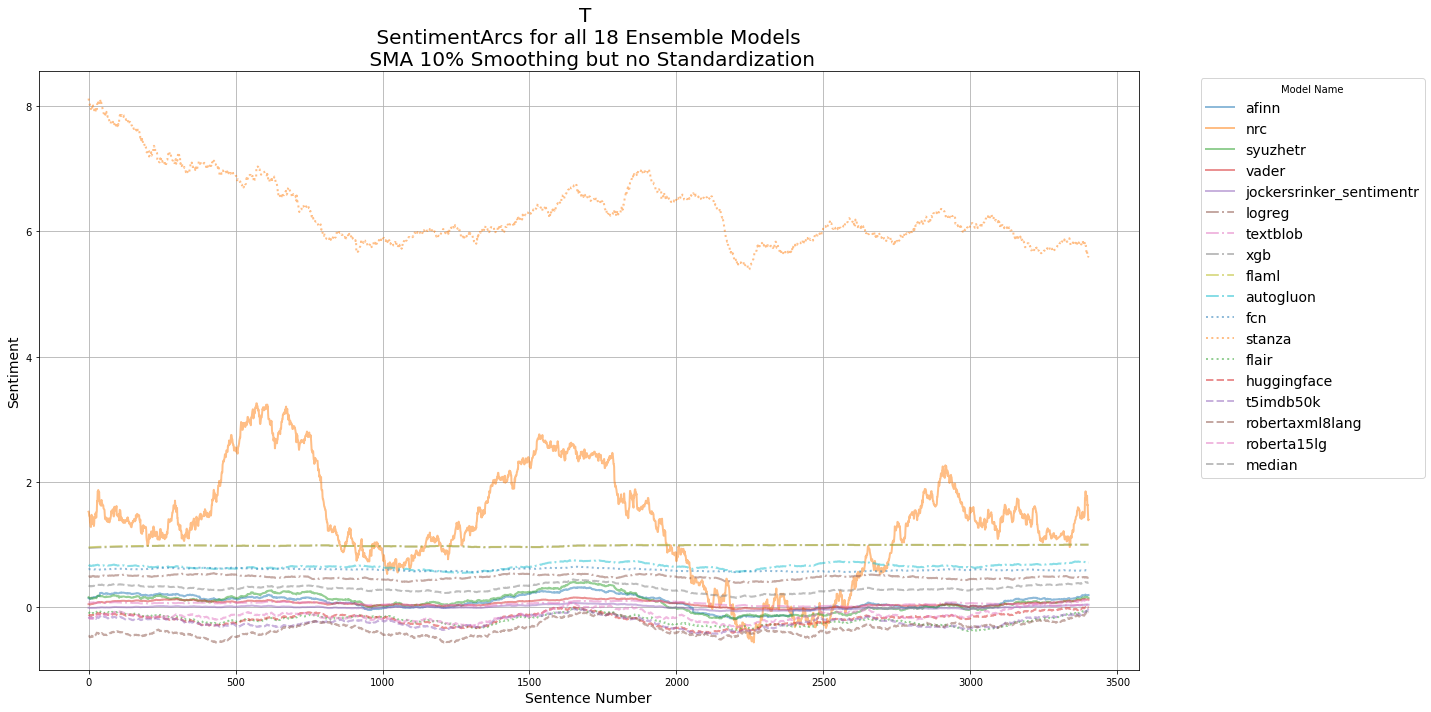

In [80]:
#@title Enter SMA window size as a Percent of total Corpus Length

Window_Percent = 10 #@param {type:"slider", min:1, max:30, step:1}

win_size = int(Window_Percent/100 * subensemble_df.shape[0])

plt.figure(figsize=(20,10))

# If does not exist, calculate smaing mean (SMA)
if ~subensemble_df.columns.str.contains('_sma').any():
  for acol in models_subensemble_ls:
    acol_sma = f'{acol}_sma'
    subensemble_df[acol_sma] = subensemble_df[acol].rolling(win_size, center=True, min_periods=0).mean()

# Plot the SMA (*_sma columns) SentimentArcs for Ensemble Models
for acol in models_subensemble_ls:
  if acol in models_lexicon_ls:
    alinestyle = 'solid'
  elif acol in models_heuristic_ls:
    alinestyle = 'solid'
  elif acol in models_tradml_ls:
    alinestyle = 'dashdot'
  elif acol in models_dnn_ls:
    alinestyle = 'dotted'
  elif acol in models_transformer_ls:
    alinestyle='dashed'

  acol_sma = f'{acol}_sma'
  subensemble_df[acol_sma].plot(alpha=0.5, label=acol, linewidth=2, linestyle=alinestyle)

plt.grid(True)
plt.title(f'{Novel_Title[0]} \n SentimentArcs for all {len(models_subensemble_ls)} Ensemble Models \n SMA {Window_Percent}% Smoothing but no Standardization', fontsize=20)
plt.xlabel('Sentence Number', fontsize=14)
plt.ylabel('Sentiment', fontsize=14)
# plt.legend(title='Model Name', loc='best')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='Model Name', fontsize=14)
plt.tight_layout()
plt.show();

# Standardize the SMA Smoothed SentimentArcs

In [81]:
# Select Standardized Method and Standardize all Model Values

#@title Select a Standardization Method to Use:

Model_Standardization_Method = "zScore" #@param ["zScore", "MinMax", "Robust"]

# Create Standardized versions of each Model/Column values
# CAUTION: Only run once

# Select a Standardization method = ['zscore','minmax','robust']
# Model_Standardization_Method = 'robust'

if Model_Standardization_Method == 'zScore':
  scaler = StandardScaler()
elif Model_Standardization_Method == 'MinMax':
  scaler = MinMaxScaler()
elif Model_Standardization_Method == 'Robust':
  scaler = RobustScaler()

# If does not exist, standardize the smaing mean (SMA)
if ~subensemble_df.columns.str.contains('_stdsma').any():
  for acol in models_subensemble_ls:
    acol_sma = f'{acol}_sma'
    acol_stdsma = f'{acol}_stdsma'
    subensemble_df[acol_stdsma] = scaler.fit_transform(subensemble_df[acol_sma].values.reshape(-1,1))

subensemble_df.head()

,sent_no,parag_no,sect_no,sent_raw,sentimentr,syuzhetr,bing,sentiword_sentimentr,senticnet_sentimentr,nrc,afinn,vader,textblob,pattern,stanza,flair,jockersrinker_sentimentr,jockers_sentimentr,bing_sentimentr,lmcd_sentimentr,roberta15lg,yelp,nlptown,huggingface,hinglish,imdb2way,t5imdb50k,robertaxml8lang,fcn,lstm,cnn,sent_clean,multinb,logreg,logreg_cv,rf,xgb,flaml,autogluon,median,afinn_sma,nrc_sma,syuzhetr_sma,vader_sma,jockersrinker_sentimentr_sma,logreg_sma,textblob_sma,xgb_sma,flaml_sma,autogluon_sma,fcn_sma,stanza_sma,flair_sma,huggingface_sma,t5imdb50k_sma,robertaxml8lang_sma,roberta15lg_sma,median_sma,afinn_stdsma,nrc_stdsma,syuzhetr_stdsma,vader_stdsma,jockersrinker_sentimentr_stdsma,logreg_stdsma,textblob_stdsma,xgb_stdsma,flaml_stdsma,autogluon_stdsma,fcn_stdsma,stanza_stdsma,flair_stdsma,huggingface_stdsma,t5imdb50k_stdsma,robertaxml8lang_stdsma,roberta15lg_stdsma,median_stdsma
0,0,0,0,"""Yes, of course, if it's fine tomorrow,"" said ...",1.05,1.05,29.429983,0.250000,-0.702,0.000000,1.201011,0.5423,0.416667,0.173042,4.804044,0.9820,0.316587,0.316587,0.301511,0.0,0.997045,4.530780,2.391533,0.998531,-0.494797,0.785985,1,1.626460,0.799107,0.846307,0.332184,yes of course if it is fine tomorrow said...,1,1,1,1,1,1,1,1.0,0.147270,1.525857,0.162059,0.050906,-0.006031,0.488235,0.083371,0.947059,0.958824,0.676471,0.608380,8.119097,-0.077255,-0.116946,-0.170588,-0.454966,-0.166241,0.348741,0.530281,0.208341,0.566153,-0.219206,-0.230685,0.177745,1.051371,-3.281223,-2.624740,0.456600,0.455218,3.228045,1.599421,0.702436,0.781575,-0.988365,-0.456533,0.790050
1,1,0,0,"""But you'll have to be up with the lark,"" she ...",0.00,0.00,0.000000,-0.343750,0.713,0.000000,0.000000,0.0000,0.000000,0.000000,4.642334,0.9052,0.000000,0.000000,0.000000,0.0,0.861890,2.399060,2.440373,-0.974143,0.846856,-0.537423,-1,0.680818,0.771381,0.850767,0.420182,but you will have to be up with the lark sh...,0,0,0,1,1,1,1,0.0,0.146408,1.516934,0.156433,0.050608,-0.007555,0.491228,0.082883,0.947368,0.959064,0.672515,0.609656,8.094528,-0.082622,-0.122038,-0.163743,-0.454941,-0.171114,0.346701,0.522760,0.197980,0.525335,-0.225460,-0.282843,0.265152,1.031798,-3.254304,-2.601903,0.369317,0.518628,3.183942,1.532853,0.649905,0.861734,-0.988138,-0.510052,0.755495
2,2,1,0,To her son these words conveyed an extraordina...,2.70,1.70,40.884576,-0.229167,3.015,7.198481,0.501025,0.4215,0.583333,0.328472,13.026639,0.9996,0.385714,0.242857,0.285714,0.0,0.998681,4.715061,4.658196,0.999797,1.959686,0.998975,1,1.556802,0.590935,0.995762,0.371851,to her son these words conveyed an extraordina...,1,1,0,1,1,1,1,1.0,0.139874,1.459445,0.151163,0.048094,-0.009160,0.494186,0.079494,0.947674,0.959302,0.668605,0.608786,8.064517,-0.087949,-0.127116,-0.168605,-0.463184,-0.175905,0.341779,0.465694,0.131226,0.487101,-0.278275,-0.337738,0.351541,0.895746,-3.227698,-2.579332,0.283048,0.475400,3.130072,1.466771,0.597515,0.804802,-1.061740,-0.562678,0.672088
3,3,1,0,"Since he belonged, even at the age of six, to ...",4.40,4.40,53.522015,0.281250,2.486,13.693781,2.125322,0.9631,0.011111,0.014445,22.103345,0.9998,0.465000,0.465000,0.300000,0.1,0.996760,4.855800,4.526761,0.998104,0.752392,0.999034,1,-1.373809,0.474658,0.994165,0.015341,since he belonged even at the age of six to ...,1,1,1,1,1,1,1,1.0,0.139065,1.451009,0.150289,0.047816,-0.009107,0.491329,0.079035,0.947977,0.959538,0.670520,0.608520,8.043929,-0.084084,-0.123259,-0.161850,-0.463354,-0.169124,0.342925,0.458634,0.121430,0.480762,-0.284115,-0.335926,0.268113,0.877299,-3.201399,-2.557021,0.325313,0.462169,3.093117,1.514717,0.637304,0.883900,-1.063259,-0.488202,0.691516
4,4,1,0,It was fringed with joy.,0.75,0.75,38.322429,0.125000,0.889,8.613681,1.754963,0.5859,0.800000,0.328472,3.509926,0.9945,0.335410,0.335410,0.447214,0.0,0.998756,3.411104,4.534395,0.999693,1.967229,0.998880,1,1.879106,0.807452,0.660350,0.277155,it was fringed with joy,1,1,1,1,1,1,1,1.0,0.138266,1.442670,0.149425,0.047541,-0.009054,0.488506,0.078580,0.948276,0.95977

# Save Checkpoint

In [ ]:
!pwd

In [ ]:
!ls

In [ ]:
# Save newly cleaned (Smoothed then Standardized) Ensemble Model data

file_fullpath = get_fullpath(ftype='data_clean')
ensemble_df.to_csv(file_fullpath)

print(f'Saved to file: {file_fullpath}')

In [ ]:
# Verify saved file contents

!head -n 10 $file_fullpath

# **Plot Sentiment Arcs**

In [82]:
# Confirm Ensemble Models and Optionally Save Plot to File

#@title Confirm Ensemble SentimentArcs and Option to Saved:
Save_Plot = True #@param {type:"boolean"}
HiRes_300dpi = True #@param {type:"boolean"}

# ensemble_ls = ensemble_lexicon_ls + ensemble_heuristic_ls + ensemble_tradml_ls + \
#               ensemble_dnn_ls + ensemble_transformer_ls

print(f'Confirm these are the all the Model(s) to include in the Ensemble:\n')

for i, amodel in enumerate(models_subensemble_ls):
  print(f'  Model #{i:>2}: {amodel}') # ({models_dt[amodel][1]})')

print(f'\nIf there is an error in these {len(models_subensemble_ls)} models, \n go back and rerun the previous code cells.')

Confirm these are the all the Model(s) to include in the Ensemble:

  Model # 0: afinn
  Model # 1: nrc
  Model # 2: syuzhetr
  Model # 3: vader
  Model # 4: jockersrinker_sentimentr
  Model # 5: logreg
  Model # 6: textblob
  Model # 7: xgb
  Model # 8: flaml
  Model # 9: autogluon
  Model #10: fcn
  Model #11: stanza
  Model #12: flair
  Model #13: huggingface
  Model #14: t5imdb50k
  Model #15: robertaxml8lang
  Model #16: roberta15lg
  Model #17: median

If there is an error in these 18 models, 
 go back and rerun the previous code cells.


## Detailed SMA Plots

In [ ]:
Novel_Title

Saved hi-res 300dpi Plot to: ./plots/plot_t_18models_sma10_300dpi.png


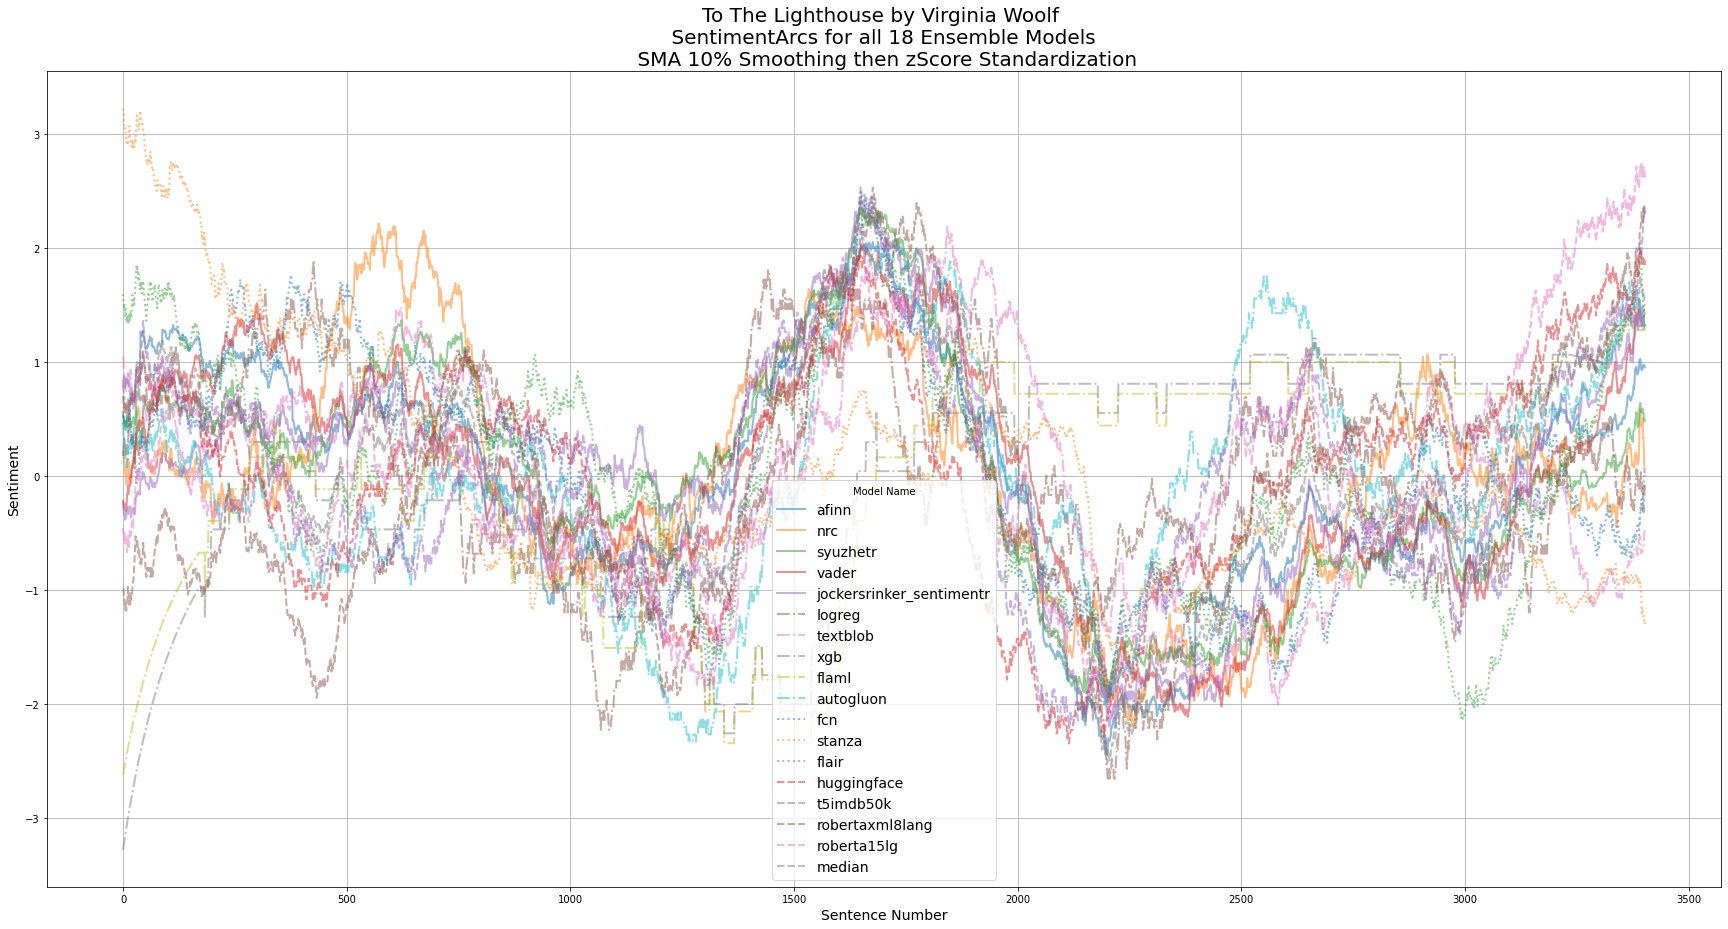

In [83]:
# Plot all the Model values that have been Smoothed then Standardized

plt.figure(figsize=(30,15))

# cols_stdsma_ls = [x for x in ensemble_df.columns if x.endswith('_stdsma')]

# cols_sma_ls = [x for x in ensemble_df.columns if x.endswith('_sma')]
for acol in models_subensemble_ls:
  if acol in models_lexicon_ls:
    alinestyle = 'solid'
  elif acol in models_heuristic_ls:
    alinestyle = 'solid'
  elif acol in models_tradml_ls:
    alinestyle = 'dashdot'
  elif acol in models_dnn_ls:
    alinestyle = 'dotted'
  elif acol in models_transformer_ls:
    alinestyle='dashed'

  acol_stdsma = f'{acol}_stdsma'
  subensemble_df[acol_stdsma].plot(alpha=0.5, label=acol, linewidth=2, linestyle=alinestyle)

plt.grid(True)
# plt.title(f'{Novel_Title[0]} \n Sentiment Analysis \n SMA {Window_Percent}% Smoothing then {Model_Standardization_Method} Standardization', fontsize=20)
plt.title(f'{Novel_Title} \n SentimentArcs for all {len(models_subensemble_ls)} Ensemble Models \n SMA {Window_Percent}% Smoothing then {Model_Standardization_Method} Standardization', fontsize=20)
plt.xlabel('Sentence Number', fontsize=14)
plt.ylabel('Sentiment', fontsize=14)

plt.legend(title='Model Name', loc='best', fontsize=14)
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='Model Name', prop={"size":16})
# plt.tight_layout()

if Save_Plot:
  # get_fullpath(ftype='data_clean', first_note='vader', last_note='anote bnote', plot_ext='png', no_date=True)
  if HiRes_300dpi:
    #fig.set_size_inches(30.,18.)
    # figsize_tup = (40,20)
    # figsize_str = f'figsize_{figsize_tup[0]}_{figsize_tup[1]}'
    # plt.figure(figsize=figsize_tup)
    plot_fullpath = get_fullpath(ftype='plot', first_note=f'{len(models_subensemble_ls)}models', last_note=f'sma{Window_Percent}_300dpi', no_date=True) # last_note=figsize_str, no_date=True)
    plt.savefig(plot_fullpath, dpi=300)
    print(f'Saved hi-res 300dpi Plot to: {plot_fullpath}')
  else:
    # figsize_tup = (20,10)
    # figsize_str = f'figsize_{figsize_tup[0]}_{figsize_tup[1]}'
    # plt.figure(figsize=figsize_tup)
    plot_fullpath = get_fullpath(ftype='plot', first_note=f'{len(models_subensemble_ls)}models', last_note=f'sma{Window_Percent}_100dpi', no_date=True) # last_note=figsize_str, no_date=True)
    plt.savefig(plot_fullpath, dpi=100)
    print(f'Saved low-res 100dpi Plot to: {plot_fullpath}')

plt.show();


## General LOWESS Plots

In [84]:
def get_lowess_sma(adf, acol, awin_per=10, afrac=0.08):
  '''
  Given a DataFrame, Column Name and Frac float
  Return an (n x 2)np.array of LOWESS x,y smoothed values and SMA y_sma values
  '''

  # win_per = 10 # SMA window as % of corpus length
  win_size = int(awin_per/100*adf.shape[0])
  
  # Generate data looking like cosine
  x = adf.index # np.random.uniform(0, 4 * np.pi, size=200)
  # Experiment: apply LOWESS smoothing after SMA smoothing
  y_sma = adf[acol].rolling(win_size, center=True, min_periods=0).mean().values # np.cos(x) + np.random.random(size=len(x))
  y = adf[acol]

  # Compute a lowess smoothing of the data
  smoothed = sm.nonparametric.lowess(exog=x, endog=y, frac=afrac)

  return x, y, y_sma, smoothed

# Get LOWESS smoothed values for all Standardized Models



In [87]:
subensemble_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3403 entries, 0 to 3402
Data columns (total 76 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   sent_no                          3403 non-null   int64  
 1   parag_no                         3403 non-null   int64  
 2   sect_no                          3403 non-null   int64  
 3   sent_raw                         3403 non-null   object 
 4   sentimentr                       3403 non-null   float64
 5   syuzhetr                         3403 non-null   float64
 6   bing                             3403 non-null   float64
 7   sentiword_sentimentr             3403 non-null   float64
 8   senticnet_sentimentr             3403 non-null   float64
 9   nrc                              3403 non-null   float64
 10  afinn                            3403 non-null   float64
 11  vader                            3403 non-null   float64
 12  textblob            

In [90]:
subensemble_df.drop(columns=[x for x in subensemble_df.columns if x.endswith('lowess')], inplace=True)

In [91]:
#@title Set LOWESS smoothed values of Model

# LOWESS Smoothing Fraction Size
LOWESS_Fraction = 20 #@param {type:"slider", min:1, max:30, step:1}
# Confirm Ensemble Models and Optionally Save Plot to File



In [92]:
# Compute LOWESS smoothed and LOWESS smoothed+Standardized time series in ensemble DataFrame

# novel_lowess_dt = {}
model_labels_dt = {}

# If does not exist, calculate LOWESS(*_lowess) and LOWESS+Standardized(*_stdlowess) values/columns
if ~subensemble_df.columns.str.contains('_stdlowess').any():
  for i, amodel in enumerate(models_subensemble_ls):
    print(f'Calculating (a)LOWESS and (b)LOWESS+Standardized values for Model #{i:>2}: {amodel}')
    lowess_frac = 1./int(LOWESS_Fraction)
    amodel_stdsma = f'{amodel}_stdsma'
    amodel_lowess = f'{amodel}_lowess'
    amodel_stdlowess = f'{amodel}_stdlowess'

    # KEY DECISION: (LOWESS of SMA+STD:amodel_stdsma) > (LOWESS of RAW+STD:amodel)
    # _, _, _, smoothed = get_lowess(subensemble_df, amodel, awin_per=Window_Percent, afrac=lowess_frac)
    _, _, _, smoothed = get_lowess_sma(subensemble_df, amodel_stdsma, awin_per=Window_Percent, afrac=lowess_frac)
    x_vals = smoothed[:, 0]
    y_vals = smoothed[:, 1]
    # novel_lowess_dt[amodel] = (x_vals, y_vals)
    subensemble_df[amodel_lowess] = pd.Series(y_vals)
    subensemble_df[amodel_stdlowess] = scaler.fit_transform(subensemble_df[amodel_lowess].values.reshape(-1,1))

Calculating (a)LOWESS and (b)LOWESS+Standardized values for Model # 0: afinn
Calculating (a)LOWESS and (b)LOWESS+Standardized values for Model # 1: nrc
Calculating (a)LOWESS and (b)LOWESS+Standardized values for Model # 2: syuzhetr
Calculating (a)LOWESS and (b)LOWESS+Standardized values for Model # 3: vader
Calculating (a)LOWESS and (b)LOWESS+Standardized values for Model # 4: jockersrinker_sentimentr
Calculating (a)LOWESS and (b)LOWESS+Standardized values for Model # 5: logreg
Calculating (a)LOWESS and (b)LOWESS+Standardized values for Model # 6: textblob
Calculating (a)LOWESS and (b)LOWESS+Standardized values for Model # 7: xgb
Calculating (a)LOWESS and (b)LOWESS+Standardized values for Model # 8: flaml
Calculating (a)LOWESS and (b)LOWESS+Standardized values for Model # 9: autogluon
Calculating (a)LOWESS and (b)LOWESS+Standardized values for Model #10: fcn
Calculating (a)LOWESS and (b)LOWESS+Standardized values for Model #11: stanza
Calculating (a)LOWESS and (b)LOWESS+Standardized va

In [93]:
subensemble_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3403 entries, 0 to 3402
Data columns (total 112 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   sent_no                             int64  
 1   parag_no                            int64  
 2   sect_no                             int64  
 3   sent_raw                            object 
 4   sentimentr                          float64
 5   syuzhetr                            float64
 6   bing                                float64
 7   sentiword_sentimentr                float64
 8   senticnet_sentimentr                float64
 9   nrc                                 float64
 10  afinn                               float64
 11  vader                               float64
 12  textblob                            float64
 13  pattern                             float64
 14  stanza                              float64
 15  flair                               float64
 16  jocke

In [94]:
subensemble_df.head()

,sent_no,parag_no,sect_no,sent_raw,sentimentr,syuzhetr,bing,sentiword_sentimentr,senticnet_sentimentr,nrc,afinn,vader,textblob,pattern,stanza,flair,jockersrinker_sentimentr,jockers_sentimentr,bing_sentimentr,lmcd_sentimentr,roberta15lg,yelp,nlptown,huggingface,hinglish,imdb2way,t5imdb50k,robertaxml8lang,fcn,lstm,cnn,sent_clean,multinb,logreg,logreg_cv,rf,xgb,flaml,autogluon,median,...,t5imdb50k_stdsma,robertaxml8lang_stdsma,roberta15lg_stdsma,median_stdsma,afinn_lowess,afinn_stdlowess,nrc_lowess,nrc_stdlowess,syuzhetr_lowess,syuzhetr_stdlowess,vader_lowess,vader_stdlowess,jockersrinker_sentimentr_lowess,jockersrinker_sentimentr_stdlowess,logreg_lowess,logreg_stdlowess,textblob_lowess,textblob_stdlowess,xgb_lowess,xgb_stdlowess,flaml_lowess,flaml_stdlowess,autogluon_lowess,autogluon_stdlowess,fcn_lowess,fcn_stdlowess,stanza_lowess,stanza_stdlowess,flair_lowess,flair_stdlowess,huggingface_lowess,huggingface_stdlowess,t5imdb50k_lowess,t5imdb50k_stdlowess,robertaxml8lang_lowess,robertaxml8lang_stdlowess,roberta15lg_lowess,roberta15lg_stdlowess,median_lowess,median_stdlowess
0,0,0,0,"""Yes, of course, if it's fine tomorrow,"" said ...",1.05,1.05,29.429983,0.250000,-0.702,0.000000,1.201011,0.5423,0.416667,0.173042,4.804044,0.9820,0.316587,0.316587,0.301511,0.0,0.997045,4.530780,2.391533,0.998531,-0.494797,0.785985,1,1.626460,0.799107,0.846307,0.332184,yes of course if it is fine tomorrow said...,1,1,1,1,1,1,1,1.0,...,0.781575,-0.988365,-0.456533,0.790050,0.579616,0.593894,0.177262,0.185508,0.517344,0.528560,-0.088316,-0.092498,-0.312033,-0.319195,0.219192,0.232547,0.741042,0.762008,-3.070747,-3.103054,-2.450665,-2.506736,0.309734,0.319105,0.236031,0.247533,3.067580,3.135363,1.566217,1.639748,0.727544,0.750740,0.868903,0.910623,-0.997365,-1.038900,-0.433612,-0.444045,0.721084,0.741424
1,1,0,0,"""But you'll have to be up with the lark,"" she ...",0.00,0.00,0.000000,-0.343750,0.713,0.000000,0.000000,0.0000,0.000000,0.000000,4.642334,0.9052,0.000000,0.000000,0.000000,0.0,0.861890,2.399060,2.440373,-0.974143,0.846856,-0.537423,-1,0.680818,0.771381,0.850767,0.420182,but you will have to be up with the lark sh...,0,0,0,1,1,1,1,0.0,...,0.861734,-0.988138,-0.510052,0.755495,0.587002,0.601483,0.177206,0.185450,0.519303,0.530561,-0.078644,-0.082576,-0.307701,-0.314756,0.225605,0.239392,0.740976,0.761940,-3.055118,-3.087223,-2.437345,-2.493095,0.310142,0.319531,0.239978,0.251670,3.062666,3.130333,1.566538,1.640085,0.728305,0.751525,0.869428,0.911172,-0.992338,-1.033669,-0.424406,-0.434417,0.724510,0.744951
2,2,1,0,To her son these words conveyed an extraordina...,2.70,1.70,40.884576,-0.229167,3.015,7.198481,0.501025,0.4215,0.583333,0.328472,13.026639,0.9996,0.385714,0.242857,0.285714,0.0,0.998681,4.715061,4.658196,0.999797,1.959686,0.998975,1,1.556802,0.590935,0.995762,0.371851,to her son these words conveyed an extraordina...,1,1,0,1,1,1,1,1.0,...,0.804802,-1.061740,-0.562678,0.672088,0.594369,0.609051,0.177139,0.185381,0.521253,0.532552,-0.068992,-0.072673,-0.303376,-0.310325,0.232016,0.246234,0.740920,0.761882,-3.039505,-3.071409,-2.424040,-2.479470,0.310543,0.319950,0.243941,0.255823,3.057756,3.125308,1.566842,1.640404,0.729054,0.752296,0.869938,0.911706,-0.987327,-1.028454,-0.415229,-0.424819,0.727923,0.748465
3,3,1,0,"Since he belonged, even at the age of six, to ...",4.40,4.40,53.522015,0.281250,2.486,13.693781,2.125322,0.9631,0.011111,0.014445,22.103345,0.9998,0.465000,0.465000,0.300000,0.1,0.996760,4.855800,4.526761,0.998104,0.752392,0.999034,1,-1.373809,0.474658,0.994165,0.015341,since he belonged even at the age of six to ...,1,1,1,1,1,1,1,1.0,...,0.883900,-1.063259,-0.488202,0.691516,0.601716,0.616600,0.177061,0.185301,0.523192,0.534532,-0.059358,-0.062790,-0.299059,-0.305902,0.238423,0.253073,0.740874,0.761834,-3.023910,-3.055612,-2.410749,-2.465859,0.310937,0.320362,0.247919,0.259992,3.052850,3.120286,1.567130,1.640705,0.729788,0.753053,0.870432,0.912224,-0.982332,-1.023256,-0.406082,-0.415251,0.731322,0.751965
4,4,1,0,It was frin

## Plot Ensemble of Selected Models

In [95]:
subensemble_df.columns

Index(['sent_no', 'parag_no', 'sect_no', 'sent_raw', 'sentimentr', 'syuzhetr',
       'bing', 'sentiword_sentimentr', 'senticnet_sentimentr', 'nrc',
       ...
       'huggingface_lowess', 'huggingface_stdlowess', 't5imdb50k_lowess',
       't5imdb50k_stdlowess', 'robertaxml8lang_lowess',
       'robertaxml8lang_stdlowess', 'roberta15lg_lowess',
       'roberta15lg_stdlowess', 'median_lowess', 'median_stdlowess'],
      dtype='object', length=112)

In [97]:
stdlowess_ls = [x for x in subensemble_df.columns if x.endswith('_stdlowess')]
stdlowess_ls

['afinn_stdlowess',
 'nrc_stdlowess',
 'syuzhetr_stdlowess',
 'vader_stdlowess',
 'jockersrinker_sentimentr_stdlowess',
 'logreg_stdlowess',
 'textblob_stdlowess',
 'xgb_stdlowess',
 'flaml_stdlowess',
 'autogluon_stdlowess',
 'fcn_stdlowess',
 'stanza_stdlowess',
 'flair_stdlowess',
 'huggingface_stdlowess',
 't5imdb50k_stdlowess',
 'robertaxml8lang_stdlowess',
 'roberta15lg_stdlowess',
 'median_stdlowess']

Saved hi-res 300dpi Plot to: ./plots/plot_t_lowess20_of_zScore_SMA10_300dpi.png


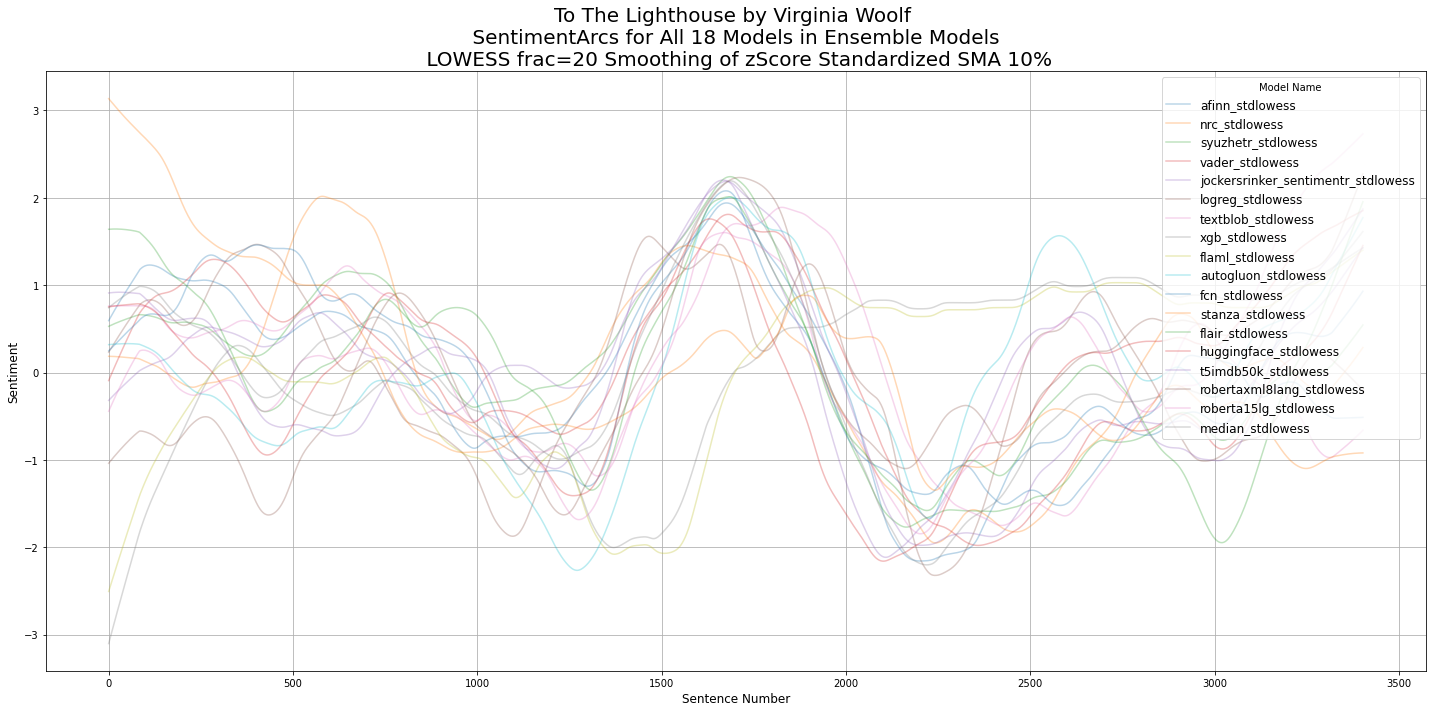

In [98]:
# EDA plot of All LOWESS Smoothed Standardized+SMA SentimentArcs by Model Family

#@markdown Confirm Ensemble SentimentArcs and Option to Saved:
Save_Plot = True #@param {type:"boolean"}
HiRes_300dpi = True #@param {type:"boolean"}

plt.figure(figsize=(20, 10))

stdlowess_ls = [x for x in subensemble_df.columns if x.endswith('_stdlowess')]

# ax, fig = plt.subplot()

for i, an_arc in enumerate(stdlowess_ls):
  subensemble_df[an_arc].plot(label=an_arc, alpha=0.3)

# plt.title(f'{Novel_Title[0]} \n Sentiment Analysis \n LOWESS with {Model_Standardization_Method} Standardization')

plt.grid(True)
plt.title(f'{Novel_Title} \n SentimentArcs for All {len(models_subensemble_ls)} Models in Ensemble Models \n LOWESS frac={LOWESS_Fraction} Smoothing of {Model_Standardization_Method} Standardized SMA {Window_Percent}%', fontsize=20)
plt.xlabel('Sentence Number', fontsize=12)
plt.ylabel('Sentiment', fontsize=12)
plt.legend(title='Model Name', loc='upper right', fontsize=12)
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='Model Name')
plt.tight_layout()

if Save_Plot:
  # get_fullpath(ftype='data_clean', first_note='vader', last_note='anote bnote', plot_ext='png', no_date=True)
  if HiRes_300dpi:
    # fig.set_size_inches(30.,18.)
    # figsize_tup = (40,20)
    # figsize_str = f'figsize_{figsize_tup[0]}_{figsize_tup[1]}'
    # plt.figure(figsize=figsize_tup)
    plot_fullpath = get_fullpath(ftype='plot', first_note=f'lowess{LOWESS_Fraction}_of_{Model_Standardization_Method}_SMA{Window_Percent}_300dpi', no_date=True) # last_note=figsize_str, no_date=True)
    plt.savefig(plot_fullpath, dpi=300)
    print(f'Saved hi-res 300dpi Plot to: {plot_fullpath}')
  else:
    # figsize_tup = (20,10)
    # figsize_str = f'figsize_{figsize_tup[0]}_{figsize_tup[1]}'
    # plt.figure(figsize=figsize_tup)
    plot_fullpath = get_fullpath(ftype='plot', first_note=f'lowess{LOWESS_Fraction}_of_{Model_Standardization_Method}_SMA{Window_Percent}__100dpi', no_date=True) # last_note=figsize_str, no_date=True)
    plt.savefig(plot_fullpath, dpi=100)
    print(f'Saved low-res 100dpi Plot to: {plot_fullpath}')

plt.show();


# **Downsample with LTTB**

In [99]:
!pip install lttb

In [100]:
import lttb

## Option (a): Read in LTTB Downsamples

In [ ]:
# Save all Corpora with both old and new LTTB reduced Models

corpora_all25_dt = {}

subdir_all = 'data_corpora_all'

temp_df = pd.DataFrame()

for i, acorpus in enumerate(corpora_ls):


  # acorpus_sent_len = corpora_all_dt[acorpus]['xgb'].shape[0]

  filename_out = f'models_all25_{acorpus}.csv'
  fullpath_out = f'./{subdir_all}/{filename_out}'
  print(f'Reading Corpus: {acorpus} from file: {fullpath_out}')

  corpora_all25_dt[acorpus] = pd.read_csv(fullpath_out, index_col=[0])

## Option (b): Generate LTTB Downsamples

In [165]:
models_all_subensemble_ls

['robertaxml8lang_lowess',
 'robertaxml8lang_stdlowess',
 'xgb',
 'median_stdsma',
 'afinn',
 't5imdb50k_lowess',
 'autogluon',
 'vader',
 't5imdb50k_stdlowess',
 'textblob',
 'huggingface',
 't5imdb50k',
 'median',
 'median_lowess',
 'roberta15lg_stdsma',
 'jockersrinker_sentimentr_stdlowess',
 'sentiword_sentimentr',
 'flaml_lowess',
 'stanza_sma',
 'syuzhetr_sma',
 'autogluon_stdsma',
 'bing_sentimentr',
 'median_sma',
 'nrc_stdsma',
 'sentimentr',
 'huggingface_stdlowess',
 'textblob_stdsma',
 'syuzhetr_stdsma',
 'xgb_lowess',
 'syuzhetr_lowess',
 'hinglish',
 'pattern',
 'logreg_sma',
 'robertaxml8lang_sma',
 'vader_stdlowess',
 'imdb2way',
 'robertaxml8lang_stdsma',
 'bing',
 'afinn_stdsma',
 'stanza_lowess',
 'xgb_stdsma',
 'logreg_cv',
 'logreg_lowess',
 'flaml',
 'vader_sma',
 'nrc_lowess',
 'nrc_stdlowess',
 'median_stdlowess',
 'stanza',
 'fcn_lowess',
 'textblob_sma',
 'textblob_lowess',
 'rf',
 'fcn_sma',
 'autogluon_lowess',
 'multinb',
 'flair_lowess',
 't5imdb50k_sma',


In [164]:
# Cut and paste one of these models into the next code cell Model_to_Downsample

','.join([f"'{x}'" for x in models_subensemble_ls])

"'afinn','nrc','syuzhetr','vader','jockersrinker_sentimentr','logreg','textblob','xgb','flaml','autogluon','fcn','stanza','flair','huggingface','t5imdb50k','robertaxml8lang','roberta15lg'"

In [167]:
models_lttb_subensemble_df = pd.DataFrame()

In [179]:
models_all_subensemble_ls

['robertaxml8lang_lowess',
 'robertaxml8lang_stdlowess',
 'xgb',
 'median_stdsma',
 'afinn',
 't5imdb50k_lowess',
 'autogluon',
 'vader',
 't5imdb50k_stdlowess',
 'textblob',
 'huggingface',
 't5imdb50k',
 'median',
 'median_lowess',
 'roberta15lg_stdsma',
 'jockersrinker_sentimentr_stdlowess',
 'sentiword_sentimentr',
 'flaml_lowess',
 'stanza_sma',
 'syuzhetr_sma',
 'autogluon_stdsma',
 'bing_sentimentr',
 'median_sma',
 'nrc_stdsma',
 'sentimentr',
 'huggingface_stdlowess',
 'textblob_stdsma',
 'syuzhetr_stdsma',
 'xgb_lowess',
 'syuzhetr_lowess',
 'hinglish',
 'pattern',
 'logreg_sma',
 'robertaxml8lang_sma',
 'vader_stdlowess',
 'imdb2way',
 'robertaxml8lang_stdsma',
 'bing',
 'afinn_stdsma',
 'stanza_lowess',
 'xgb_stdsma',
 'logreg_cv',
 'logreg_lowess',
 'flaml',
 'vader_sma',
 'nrc_lowess',
 'nrc_stdlowess',
 'median_stdlowess',
 'stanza',
 'fcn_lowess',
 'textblob_sma',
 'textblob_lowess',
 'rf',
 'fcn_sma',
 'autogluon_lowess',
 'multinb',
 'flair_lowess',
 't5imdb50k_sma',


In [262]:
# Downsample Original Model Time Series down to LTTB_Points

#@markdown Downsample which Model?

#@markdown Downsample SentimentArc to How Many Points?
LTTB_Points = 100 #@param {type:"slider", min:25, max:500, step:5}

Model_Modification_to_Downsample = "_stdlowess" #@param ['_stdlowess', '_stdsma', '_lowess', '_sma', 'None']

subensemble_lttb_dt = {}

model_len = subensemble_df.shape[0]


print(f'LTTB downsampling {model_full_str} from {model_len} to {LTTB_Points} Points')
for i, amodel in enumerate(models_subensemble_ls):

  if Model_Modification_to_Downsample == 'None':
    model_full_str = amodel
  else:
    model_full_str = f'{amodel}{Model_Modification_to_Downsample}'

  print(f'Processing Model #{i}: {model_full_str}')

  # Generate an example data set of 100 random points:
  #  - column 0 represents time values (strictly increasing)
  #  - column 1 represents the metric of interest: CPU usage, stock price, etc.
  x_np = range(subensemble_df[model_full_str].shape[0])
  y_np = subensemble_df[model_full_str].values
  data = np.array([x_np, y_np]).T # np.random.random(100)]).T

  # Downsample it to 20 points:
  small_data = lttb.downsample(data, n_out=LTTB_Points)
  assert small_data.shape == (LTTB_Points, 2)
  # print(f'Type: {type(small_data)} and Shape: {small_data.shape}')
  subensemble_lttb_dt[model_full_str] = pd.DataFrame({'sent_no':small_data[:,0],'sentiment':small_data[:,1]})

LTTB downsampling afinn_stdlowess from 3403 to 100 Points
Processing Model #0: afinn_stdlowess
Processing Model #1: nrc_stdlowess
Processing Model #2: syuzhetr_stdlowess
Processing Model #3: vader_stdlowess
Processing Model #4: jockersrinker_sentimentr_stdlowess
Processing Model #5: logreg_stdlowess
Processing Model #6: textblob_stdlowess
Processing Model #7: xgb_stdlowess
Processing Model #8: flaml_stdlowess
Processing Model #9: autogluon_stdlowess
Processing Model #10: fcn_stdlowess
Processing Model #11: stanza_stdlowess
Processing Model #12: flair_stdlowess
Processing Model #13: huggingface_stdlowess
Processing Model #14: t5imdb50k_stdlowess
Processing Model #15: robertaxml8lang_stdlowess
Processing Model #16: roberta15lg_stdlowess


## Plot Downsampled LTTB

In [123]:
# If there are any NaN/null in the SubEnsemble of models, interpolate

# isnull_sum = subensemble_df.isnull().any(axis=1).sum()
isna_sum = subensemble_df.isna().any().sum()
if isna_sum:
  print(f'There are {isna_sum} NaN values in the Models of the SubEnsemble')
  # subensemble_df.interpolate(method='linear', inplace=True)
  subensemble_df.interpolate(method='linear', inplace=True)
else:
  print('There are no NaN values in any SubEnsemble Models')


# For Corpora 'tmorrison_beloved' both 'pattern' and thus 'pattern_z' are 0 and NaN respectively
#   for now, just fillna both with '0' as place holders for this one model (pattern) to view all other Models

# subensemble_df[]
# corpora_all_dt['tmorrison_beloved']['pattern_z'] = corpora_all_dt['tmorrison_beloved']['pattern_z'].fillna(0)

# corpora_all_dt['tmorrison_beloved']['pattern_z'] = corpora_all_dt['tmorrison_beloved']['syuzhet_z']

There are no NaN values in any SubEnsemble Models


In [264]:
# models_lttb_subensemble_dt.keys()
type(list(subensemble_lttb_dt.values())[0])

pandas.core.frame.DataFrame

In [265]:
(list(subensemble_lttb_dt.values())[1]).shape

(100, 2)

In [263]:
# Cut and paste this string into the next code cell's LTTB_Model Dropdown

lttb_ls = list(subensemble_lttb_dt.keys())
lttb_ls = [f"'{x}'" for x in lttb_ls]
lttb_str = ','.join(lttb_ls)
lttb_str

"'afinn_stdlowess','nrc_stdlowess','syuzhetr_stdlowess','vader_stdlowess','jockersrinker_sentimentr_stdlowess','logreg_stdlowess','textblob_stdlowess','xgb_stdlowess','flaml_stdlowess','autogluon_stdlowess','fcn_stdlowess','stanza_stdlowess','flair_stdlowess','huggingface_stdlowess','t5imdb50k_stdlowess','robertaxml8lang_stdlowess','roberta15lg_stdlowess'"

In [284]:
lttb_ls = list(subensemble_lttb_dt.keys())
lttb_ls = [x for x in lttb_ls]
lttb_ls

['afinn_stdlowess',
 'nrc_stdlowess',
 'syuzhetr_stdlowess',
 'vader_stdlowess',
 'jockersrinker_sentimentr_stdlowess',
 'logreg_stdlowess',
 'textblob_stdlowess',
 'xgb_stdlowess',
 'flaml_stdlowess',
 'autogluon_stdlowess',
 'fcn_stdlowess',
 'stanza_stdlowess',
 'flair_stdlowess',
 'huggingface_stdlowess',
 't5imdb50k_stdlowess',
 'robertaxml8lang_stdlowess',
 'roberta15lg_stdlowess']

In [296]:
'_'.join('jockersrinker_sentimentr_stdlowess'.split('_')[:-1])

'jockersrinker_sentimentr'

Saved hi-res 300dpi Plot to: ./plots/plot_to_the_lighthouse_by_virginia_woolf_lttb_sma10_vs_lowess20_300dpi.png


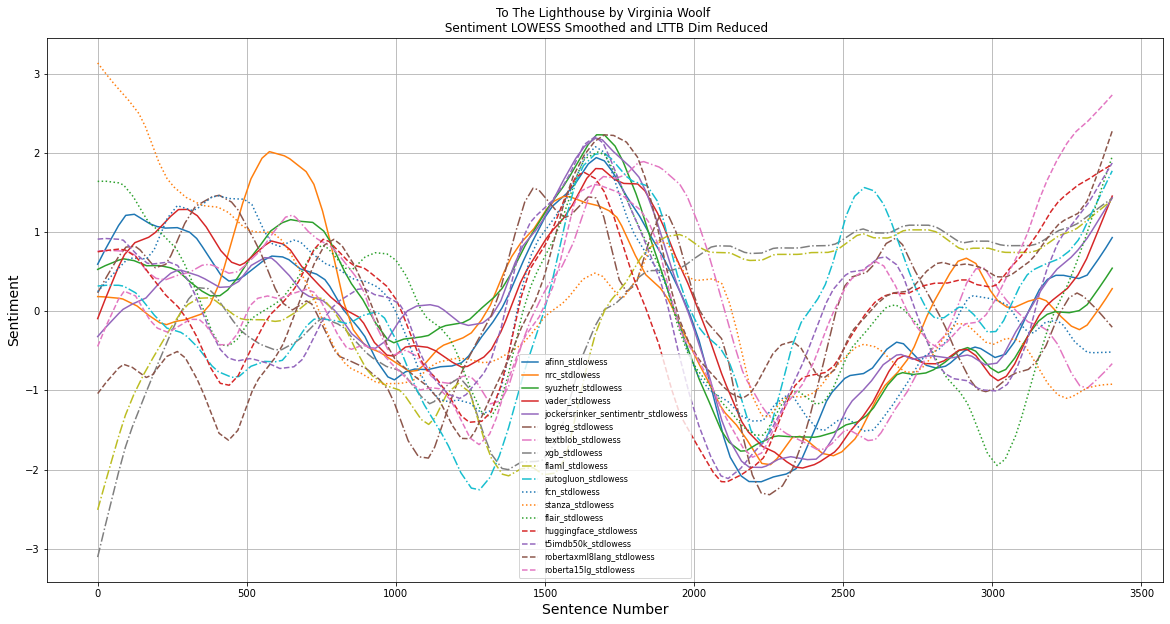

In [298]:
#@markdown Select which LTTB Dim Reduced Model to Plot:

LTTB_Model = "ALL_MODELS" #@param ['ALL_MODELS','afinn_stdlowess','nrc_stdlowess','syuzhetr_stdlowess','vader_stdlowess','jockersrinker_sentimentr_stdlowess','logreg_stdlowess','textblob_stdlowess','xgb_stdlowess','flaml_stdlowess','autogluon_stdlowess','fcn_stdlowess','stanza_stdlowess','flair_stdlowess','huggingface_stdlowess','t5imdb50k_stdlowess','robertaxml8lang_stdlowess','roberta15lg_stdlowess']

#@markdown Plot Options:
Save_Plot = True #@param {type:"boolean"}
HiRes_300dpi = True #@param {type:"boolean"}

plt.figure(figsize=(20,10))

if LTTB_Model == 'ALL_MODELS':
  for bmodel in lttb_ls:
    acol = '_'.join(bmodel.split('_')[:-1])
    # Plot the SMA (*_sma columns) SentimentArcs for Ensemble Models
    # for acol in models_subensemble_ls:
    if acol in models_lexicon_ls:
      alinestyle = 'solid'
    elif acol in models_heuristic_ls:
      alinestyle = 'solid'
    elif acol in models_tradml_ls:
      alinestyle = 'dashdot'
    elif acol in models_dnn_ls:
      alinestyle = 'dotted'
    elif acol in models_transformer_ls:
      alinestyle='dashed'

    # subensemble_df[bmodel].plot(linewidth=10, alpha=0.2)
    sns.lineplot(x=subensemble_lttb_dt[bmodel]['sent_no'].values, y=subensemble_lttb_dt[bmodel]['sentiment'].values, linestyle=alinestyle, label=f'{bmodel}')
else:
  subensemble_df[LTTB_Model].plot(linewidth=10, alpha=0.2)
  sns.lineplot(x=subensemble_lttb_dt[LTTB_Model]['sent_no'].values, y=subensemble_lttb_dt[LTTB_Model]['sentiment'].values, label=f'LTTB {LTTB_Points} Points')

plt.title(f'{Novel_Title} \n Sentiment LOWESS Smoothed and LTTB Dim Reduced')
plt.xlabel('Sentence Number', fontsize=14)
plt.ylabel('Sentiment', fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=8)

if Save_Plot:
  # get_fullpath(ftype='data_clean', first_note='vader', last_note='anote bnote', plot_ext='png', no_date=True)
  if HiRes_300dpi:
    # fig.set_size_inches(30.,18.)
    # figsize_tup = (40,20)
    # figsize_str = f'figsize_{figsize_tup[0]}_{figsize_tup[1]}'
    # plt.figure(figsize=figsize_tup)
    plot_fullpath = get_fullpath(ftype='plot', first_note=f'lttb_sma{Window_Percent}_vs_lowess{LOWESS_Fraction}_300dpi', no_date=True) # last_note=figsize_str, no_date=True)
    plt.savefig(plot_fullpath, dpi=300)
    print(f'Saved hi-res 300dpi Plot to: {plot_fullpath}')
  else:
    # figsize_tup = (20,10)
    # figsize_str = f'figsize_{figsize_tup[0]}_{figsize_tup[1]}'
    # plt.figure(figsize=figsize_tup)
    plot_fullpath = get_fullpath(ftype='plot', first_note=f'lttb_sma{Window_Percent}_vs_lowess{LOWESS_Fraction}_100dpi', no_date=True) # last_note=figsize_str, no_date=True)
    plt.savefig(plot_fullpath, dpi=100)
    print(f'Saved low-res 100dpi Plot to: {plot_fullpath}')

plt.show();

In [ ]:
# Convert Dict to DataFrame

# pd.DataFrame.from_dict(models_lttb_subensemble_dt)

In [ ]:
# temp_df = pd.DataFrame(list(models_lttb_subensemble_dt.items()))
# print(temp_df.iloc[:,1][0])

In [207]:
"""
models_lttb_subensemble_df = pd.DataFrame()
model_ct = 0
for key, val in models_lttb_subensemble_dt.items():
  if model_ct == 0:
    models_lttb_subensemble_df = list(models_lttb_subensemble_dt.values())[model_ct]
  else:
    models_lttb_subensemble_df = pd.merge(models_lttb_subensemble_df, list(models_lttb_subensemble_dt.values())[model_ct], on='sent_no')
  model_ct += 1

models_lttb_subensemble_df.head()
""";

In [ ]:
# models_lttb_subensemble_df = pd.DataFrame.from_dict(models_lttb_subensemble_dt, orient=index)
# models_lttb_subensemble_df.head()

In [126]:
[i for i in subensemble_df.columns if i.endswith('_stdlowess')]

['afinn_stdlowess',
 'nrc_stdlowess',
 'syuzhetr_stdlowess',
 'vader_stdlowess',
 'jockersrinker_sentimentr_stdlowess',
 'logreg_stdlowess',
 'textblob_stdlowess',
 'xgb_stdlowess',
 'flaml_stdlowess',
 'autogluon_stdlowess',
 'fcn_stdlowess',
 'stanza_stdlowess',
 'flair_stdlowess',
 'huggingface_stdlowess',
 't5imdb50k_stdlowess',
 'robertaxml8lang_stdlowess',
 'roberta15lg_stdlowess',
 'median_stdlowess']

# Save Checkpoint

In [ ]:
!pwd

In [ ]:
!ls

In [299]:
# Save newly cleaned (Smoothed then Standardized) Ensemble Model data

file_fullpath = get_fullpath(ftype='data_clean')
subensemble_df.to_csv(file_fullpath)

print(f'Saved to file: {file_fullpath}')

Saved to file: ./data/sentiments_clean/sa_clean_to_the_lighthouse_by_virginia_woolf_zscore_sma10_2021_11_29-09_09_07_AM.csv


In [ ]:
# Verify saved file contents

!head -n 10 $file_fullpath

# DTW Hierarchical Clustering

* https://github.com/wannesm/dtaidistance

* https://dtaidistance.readthedocs.io/en/latest/usage/clustering.html

* DTW w/Hierachical Clustering https://github.com/wannesm/dtaidistance

* HITL/Interactive Clustering (DTAIDistance+COBRAS) https://github.com/ML-KULeuven/cobras 

* https://github.com/markdregan/K-Nearest-Neighbors-with-Dynamic-Time-Warping

* https://github.com/timeseriesAI/tsai

* https://github.com/tslearn-team/tslearn

* https://stats.stackexchange.com/questions/131281/dynamic-time-warping-clustering

* https://stats.stackexchange.com/questions/109343/dynamic-time-warping-for-irregular-time-series

In [300]:
!pip install dtaidistance

     |████████████████████████████████| 1.1 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for dtaidistance: filename=dtaidistance-2.3.2-cp37-cp37m-linux_x86_64.whl size=1586315 sha256=c215976662b95a936fb3d89a983f7379dd971c718623f0a78e2ca76986d4d581
  Stored in directory: /root/.cache/pip/wheels/5e/4a/9a/30f9efb3926e3c2f28231680685b36d0041466a33e4b8f8367
Successfully built dtaidistance


In [301]:
from dtaidistance import dtw
from dtaidistance import clustering
from dtaidistance import dtw_visualisation as dtwvis

In [307]:
models_lttb_ls

['afinn_stdlowess',
 'nrc_stdlowess',
 'syuzhetr_stdlowess',
 'vader_stdlowess',
 'jockersrinker_sentimentr_stdlowess',
 'logreg_stdlowess',
 'textblob_stdlowess',
 'xgb_stdlowess',
 'flaml_stdlowess',
 'autogluon_stdlowess',
 'fcn_stdlowess',
 'stanza_stdlowess',
 'flair_stdlowess',
 'huggingface_stdlowess',
 't5imdb50k_stdlowess',
 'robertaxml8lang_stdlowess',
 'roberta15lg_stdlowess']

In [308]:
len(models_lttb_ls)

17

In [315]:
subensemble_lttb_dt.keys()

dict_keys(['afinn_stdlowess', 'nrc_stdlowess', 'syuzhetr_stdlowess', 'vader_stdlowess', 'jockersrinker_sentimentr_stdlowess', 'logreg_stdlowess', 'textblob_stdlowess', 'xgb_stdlowess', 'flaml_stdlowess', 'autogluon_stdlowess', 'fcn_stdlowess', 'stanza_stdlowess', 'flair_stdlowess', 'huggingface_stdlowess', 't5imdb50k_stdlowess', 'robertaxml8lang_stdlowess', 'roberta15lg_stdlowess'])

In [320]:
type(subensemble_lttb_dt['vader_stdlowess'].iloc[:,1])

pandas.core.series.Series

In [319]:
# Create DTW Distance Matrix for all LTTB reduced time series
 
model_lttb_np_ls = []

for i,amodel in enumerate(models_lttb_ls):
  # print(f'Model #{i}: {amodel}')
  model_lttb_np_ls.append(subensemble_lttb_dt[amodel][:,1].iloc[:,1].values)

dtw_dist_np = dtw.distance_matrix_fast(models_lttb_np_ls)

TypeError: ignored

Corpus #0 afinn_stdlowess has 2 model columns


 50%|█████     | 1/2 [00:00<00:00, 1503.33it/s]


Text(0.5, 0.98, 'afinn_stdlowess: DTW Agglomerative Hierarchical Clustering')

(None, array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe916a39210>,
       dtype=object))

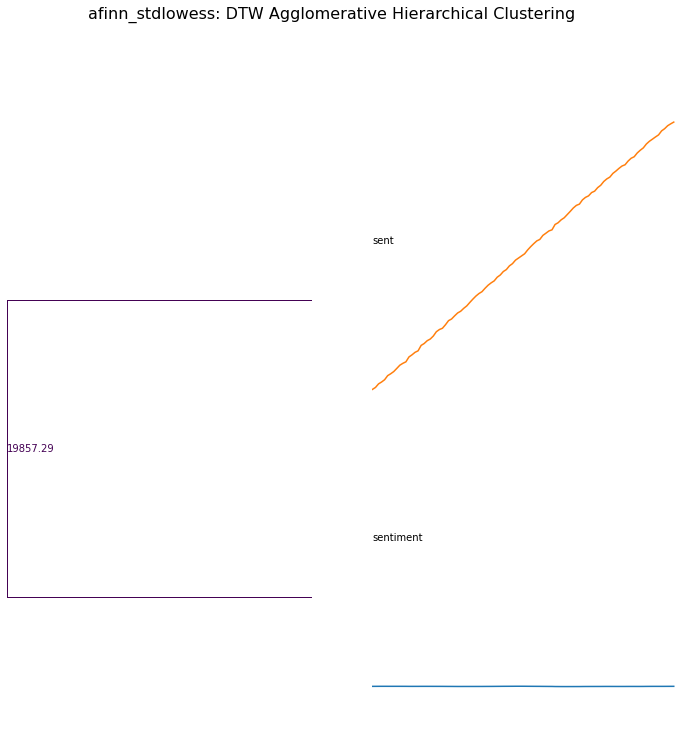

In [306]:
save_plots = False

# Dict[Corpus] of all Distance Matricies 
corpora_all_dist_dt = {}

# Create list of 1D vectorized distance matricies (one for each Corpus with Model distances)
corpora_all25vec_dt = {}

# Get lists of LTTB Dimensionality-Reduced Corpora/Models
models_lttb_ls = list(subensemble_lttb_dt.keys())

for i, acorpus in enumerate(models_lttb_ls[:1]): # [:2]): # [:2]):
  # print(f'Processing Corpus: {acorpus}')

  models_all25_ls = subensemble_lttb_dt[acorpus].columns.tolist()

  models_all25_ls = [i if i != 'logreg_cv_z_25lttb' else 'logreg-cv_z_25lttb' for i in models_all25_ls]
  models_all25_ls = [i if i != 'jockers_rinker_z_25lttb' else 'jockers-rinker_z_25lttb' for i in models_all25_ls]

  models_all25_ls = [i.split('_')[0] for i in models_all25_ls]

  print(f'Corpus #{i} {acorpus} has {len(subensemble_lttb_dt[acorpus].columns)} model columns')

  aseries = subensemble_lttb_dt[acorpus].to_numpy().T

  ds = dtw.distance_matrix_fast(aseries) #  block=((1, 4), (3, 5)))
  corpora_all_dist_dt[acorpus] = ds

  # Convert upper triangular part of this Distance Matrix (not incl diag) into 1D vector
  ds_1d = ds[np.triu_indices(ds.shape[0], k = 1)] # offset
  corpora_all25vec_dt[acorpus] = ds_1d

  # Custom Hierarchical clustering
  model1 = clustering.Hierarchical(dtw.distance_matrix, {})
  cluster_idx = model1.fit(aseries)
  # Augment Hierarchical object to keep track of the full tree
  model2 = clustering.HierarchicalTree(model1, tr_left_margin=0) # , tr_label_margin=-10)
  cluster_idx = model2.fit(aseries)

  # SciPy linkage clustering
  model3 = clustering.LinkageTree(dtw.distance_matrix, {})
  cluster_idx = model3.fit(aseries)

  # Plot Agglomerative Hierarchical Tree and Save as file
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))
  # show_ts_label = lambda idx: "ts-" + str(idx)
  show_ts_label = lambda idx: models_all25_ls[idx]
  # fig.tight_layout()
  fig.subplots_adjust(top=0.95)
  corpus_title = f'{acorpus}: DTW Agglomerative Hierarchical Clustering'
  fig.suptitle(corpus_title, fontsize=16)
  acorpus = f'{acorpus}'
  filename_path = f'./data_corpora_plots/plot_hclust_{acorpus}.png'
  if save_plots:
    # Save Plot to File
    model2.plot(filename_path, axes=ax, show_ts_label=show_ts_label, # True, # lttb_cols_ls,
              show_tr_label=True, ts_label_margin=0,
              ts_left_margin=0, tr_label_margin=0.1) #  ts_sample_length=1)
    # Display Plot File
    Image(filename_path)
    plt.margins(x=0.1, y=0.5)
    plt.show()
    plt.close()
  else:
    # Just Display Plots (no save to file)
    model2.plot(axes=ax, show_ts_label=show_ts_label, # True, # lttb_cols_ls,
              show_tr_label=True, ts_label_margin=0,
              ts_left_margin=0, tr_label_margin=0.1) #  ts_sample_length=1)
    plt.margins(x=0.1, y=0.5)
    plt.show()    
    plt.close()

# **END OF NOTEBOOK**

## Plot Individual Model within Ensemble

In [ ]:
# Get list and string for all LOWESS smoothed SMA+STD Arcs

stdlowess_ls = [x for x in ensemble_df.columns if x.endswith('_stdlowess')]

stdlowess_str = ','.join([f"'{x}'" for x in stdlowess_ls if x.endswith('_stdlowess')])
stdlowess_str

In [ ]:
# EDA plot of LOWESS Smoothed Standardized+SMA SentimentArcs by Model Family

#@title Select which Model to Plot LOWESS Smoothed of SMA+STD:

Model_Name = "vader_stdlowess" #@param ['sentimentr_stdlowess','syuzhetr_stdlowess','bing_stdlowess','sentiword_sentimentr_stdlowess','senticnet_sentimentr_stdlowess','nrc_stdlowess','afinn_stdlowess','vader_stdlowess','textblob_stdlowess','pattern_stdlowess','stanza_stdlowess','flair_stdlowess','jockersrinker_sentimentr_stdlowess','jockers_sentimentr_stdlowess','bing_sentimentr_stdlowess','lmcd_sentimentr_stdlowess','roberta15lg_stdlowess','yelp_stdlowess','nlptown_stdlowess','huggingface_stdlowess','hinglish_stdlowess','imdb2way_stdlowess','t5imdb50k_stdlowess','robertaxml8lang_stdlowess','fcn_stdlowess','lstm_stdlowess','cnn_stdlowess','multinb_stdlowess','logreg_stdlowess','logreg_cv_stdlowess','rf_stdlowess','xgb_stdlowess','flaml_stdlowess','autogluon_stdlowess','median_stdlowess']

# Novel_Name = {Novel_Title[0]} #@param [Novel_Title[0]]

#@markdown Confirm Ensemble SentimentArcs and Option to Saved:
Save_Plot = True #@param {type:"boolean"}
HiRes_300dpi = True #@param {type:"boolean"}


plt.figure(figsize=(30,20))

ensemble_df[Model_Name].plot()

plt.grid(True)
plt.title(f'{Novel_Title[0]} \n SentimentArcs for {" ".join(Model_Name.split("_")[:-1]).capitalize()} Model in Ensemble \n LOWESS frac={LOWESS_Fraction} Smoothing of {Model_Standardization_Method} Standardized SMA {Window_Percent}%', fontsize=20)
plt.xlabel('Sentence Number')
plt.ylabel('Sentiment')
# plt.legend(title='Model Name', loc='best')
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='Model Name')
plt.tight_layout()

if Save_Plot:
  # get_fullpath(ftype='data_clean', first_note='vader', last_note='anote bnote', plot_ext='png', no_date=True)
  if HiRes_300dpi:
    # fig.set_size_inches(30.,18.)
    # figsize_tup = (40,20)
    # figsize_str = f'figsize_{figsize_tup[0]}_{figsize_tup[1]}'
    # plt.figure(figsize=figsize_tup)
    plot_fullpath = get_fullpath(ftype='plot', first_note=f'{Model_Name.lower()}', last_note=f'lowess{LOWESS_Fraction}_of_{Model_Standardization_Method}_SMA{Window_Percent}_300dpi', no_date=True) # last_note=figsize_str, no_date=True)
    plt.savefig(plot_fullpath, dpi=300)
    print(f'Saved hi-res 300dpi Plot to: {plot_fullpath}')
  else:
    # figsize_tup = (20,10)
    # figsize_str = f'figsize_{figsize_tup[0]}_{figsize_tup[1]}'
    # plt.figure(figsize=figsize_tup)
    plot_fullpath = get_fullpath(ftype='plot', first_note=f'{Model_Name.lower()}', last_note=f'lowess{LOWESS_Fraction}_of_{Model_Standardization_Method}_SMA{Window_Percent}__100dpi', no_date=True) # last_note=figsize_str, no_date=True)
    plt.savefig(plot_fullpath, dpi=100)
    print(f'Saved low-res 100dpi Plot to: {plot_fullpath}')

plt.show();


## Plot Model Families within Ensemble

In [ ]:
# EDA plot of LOWESS Smoothed Standardized+SMA SentimentArcs by Model Family

#@title Select which Model Family to Plot LOWESS Smoothed of SMA+STD:

Model_Family = "heuristic" #@param ["lexicon", "heuristic", "tradml", "dnn", "transformer"]

#@markdown Confirm Ensemble SentimentArcs and Option to Saved:
Save_Plot = True #@param {type:"boolean"}
HiRes_300dpi = True #@param {type:"boolean"}

stdlowess_ls = [x for x in ensemble_df.columns if x.endswith('_stdlowess')]

# Select which family to Plot
plot_family = ['lexicon','heuristic','tradml','dnn','transformer']

plt.figure(figsize=(30,20))

# Plot the LOWESS+Standardized (*_stdlowess columns) SentimentArcs for Ensemble Models
for acol in cols_ensemble_ls:
  # print(f'Processing Model: {acol}')
  if (acol in models_lexicon_ls) & (Model_Family == 'lexicon'):
    cols_family_ls = models_lexicon_ls
    alinestyle = 'solid'
    acol_stdlowess = f'{acol}_stdlowess'
    ensemble_df[acol_stdlowess].plot(alpha=0.5, label=acol_stdlowess, linewidth=2, linestyle=alinestyle)
  elif (acol in models_heuristic_ls) & (Model_Family == 'heuristic'):
    cols_family_ls = models_heuristic_ls
    alinestyle = 'solid'
    # Catch exception with LOWESS error on lmcd_sentimentr (too many zero values?)
    # BUGFIX for lmcd_sentimentr, works with LOWESS smoothing of STD+SMA
    # if acol.startswith('lmcd_sentimentr'):
    if acol.startswith('execute_else_stmt'):
      # Keep this error check inplace in case future novels/models/params replicate this problem
      continue
    else:
      acol_stdlowess = f'{acol}_stdlowess'
      ensemble_df[acol_stdlowess].plot(alpha=0.5, label=acol_stdlowess, linewidth=2, linestyle=alinestyle)
  elif (acol in models_tradml_ls) & (Model_Family == 'tradml'):
    cols_family_ls = models_tradml_ls
    alinestyle = 'dashdot'
    acol_stdlowess = f'{acol}_stdlowess'
    ensemble_df[acol_stdlowess].plot(alpha=0.5, label=acol_stdlowess, linewidth=2, linestyle=alinestyle)
  elif (acol in models_dnn_ls) & (Model_Family == 'dnn'):
    cols_family_ls = models_dnn_ls
    alinestyle = 'dotted'
    acol_stdlowess = f'{acol}_stdlowess'
    ensemble_df[acol_stdlowess].plot(alpha=0.5, label=acol_stdlowess, linewidth=2, linestyle=alinestyle)  
  elif (acol in models_transformer_ls) & (Model_Family == 'transformer'):
    cols_family_ls = models_transformer_ls
    alinestyle='dashed'
    acol_stdlowess = f'{acol}_stdlowess'
    ensemble_df[acol_stdlowess].plot(alpha=0.5, label=acol_stdlowess, linewidth=2, linestyle=alinestyle)

plt.grid(True)
plt.title(f'{Novel_Title[0]} \n SentimentArcs for {len(cols_family_ls)} {Model_Family.capitalize()} Models in Ensemble Models \n LOWESS frac={LOWESS_Fraction} Smoothing of {Model_Standardization_Method} Standardized SMA {Window_Percent}%', fontsize=20)
plt.xlabel('Sentence Number')
plt.ylabel('Sentiment')
plt.legend(title='Model Name', loc='best')
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='Model Name')
plt.tight_layout()

if Save_Plot:
  # get_fullpath(ftype='data_clean', first_note='vader', last_note='anote bnote', plot_ext='png', no_date=True)
  if HiRes_300dpi:
    # fig.set_size_inches(30.,18.)
    # figsize_tup = (40,20)
    # figsize_str = f'figsize_{figsize_tup[0]}_{figsize_tup[1]}'
    # plt.figure(figsize=figsize_tup)
    plot_fullpath = get_fullpath(ftype='plot', first_note=f'lowess{LOWESS_Fraction}_of_{Model_Standardization_Method}_SMA{Window_Percent}_300dpi', no_date=True) # last_note=figsize_str, no_date=True)
    plt.savefig(plot_fullpath, dpi=300)
    print(f'Saved hi-res 300dpi Plot to: {plot_fullpath}')
  else:
    # figsize_tup = (20,10)
    # figsize_str = f'figsize_{figsize_tup[0]}_{figsize_tup[1]}'
    # plt.figure(figsize=figsize_tup)
    plot_fullpath = get_fullpath(ftype='plot', first_note=f'lowess{LOWESS_Fraction}_of_{Model_Standardization_Method}_SMA{Window_Percent}__100dpi', no_date=True) # last_note=figsize_str, no_date=True)
    plt.savefig(plot_fullpath, dpi=100)
    print(f'Saved low-res 100dpi Plot to: {plot_fullpath}')

plt.show();


# Save Checkpoint

In [ ]:
!pwd

In [ ]:
!ls

In [ ]:
# Save newly cleaned (Smoothed then Standardized) Ensemble Model data

file_fullpath = get_fullpath(ftype='data_clean')
ensemble_df.to_csv(file_fullpath)

print(f'Saved to file: {file_fullpath}')

In [ ]:
# Verify saved file contents

!head -n 10 $file_fullpath

# Explore Cruxes

In [ ]:
list(range(10,15))

In [ ]:
def get_crux_context(adf=ensemble_df, acol_sentraw='sent_raw', asent_no=5, ahalf_win=2, do_upper=True):
  '''
  Given a DataFrame with acol_sentraw of Sentence raw text along with
    a crux sent_no and half_win number of sentences on before and after crux point
  Return a list of Sentences that define the (2*ahalf_win + 1) context window around the Crux asent_no
  '''

  context_ls = []

  corpus_len = adf.shape[0]

  # Get lower bound of Crux Context Window
  context_min = asent_no - ahalf_win
  if context_min < 0:
    context_min = 0

  # Get upper bound of Crux Context Window
  context_max = asent_no + ahalf_win + 1 # correct for zero-based indexing 
  if context_max > corpus_len:
    context_max = corpus_len - 1

  lineno_ls = list(range(context_min,context_max))
  context_ls = adf.iloc[context_min:context_max][acol_sentraw].to_list()

  if do_upper:
    # [f(x) if condition else g(x) for x in sequence]
    crux_str = adf.iloc[asent_no][acol_sentraw]
    context_ls = [x.upper() if x == crux_str else x for x in context_ls]

  context_tup_ls = list(zip(lineno_ls, context_ls))

  return context_tup_ls

# Test

temp_tup_ls = get_crux_context(ensemble_df, 'sent_raw', 20, 5)
temp_tup_ls

In [ ]:
from scipy import interpolate
from scipy.interpolate import CubicSpline
from scipy import signal
from scipy.signal import argrelextrema

In [ ]:
def get_crux_points(adf, acol_name, text_type='sentence', win_per=5, sec_y_labels=True, sec_y_height=0, subtitle_str=' ', do_plot=True, save2file=False):
  '''
  Given a DataFrame and a Time Series Column within it and a LOWESS window
  Return a list of Min/Max Crux Point (x,y) coordinate tuples for that Column Time Series
  '''

  # print('entered get_crux_points') 
  crux_ls = []

  series_len = adf.shape[0]
  # print(f'series_len = {series_len}')

  # sent_no_min = adf[].min()
  sent_no_min = 0
  # sent_no_max = adf.sent_no.max()
  sent_no_max = series_len - 1
  # print(f'sent_no_min {sent_no_min}')

  sm_x = adf.index.values
  sm_y = adf[acol_name].values.flatten()

  half_win = int((win_per/100)*series_len)
  # print(f'half_win = {half_win}')
  # print(f'sm_y type = {type(sm_y)}')

  # Find peaks(max).
  # peak_indexes = signal.argrelextrema(sm_y, np.greater, order=half_win, mode='wrap') argrelextrema will not detect flat peaks
  peak_indexes = signal.find_peaks(sm_y, distance=half_win) # np.greater, order=half_win, mode='wrap')
  # peak_indexes = peak_indexes + sent_no_min
  # print(f'peak_indexes[0]: {peak_indexes_np[0]}')
  # print(f'peak_indexes type: {type(peak_indexes_np[0])}')
  # peak_indexes_np = peak_indexes_np + sent_no_min
  # print(f'peak_indexes type = {type(peak_indexes)}') # sent_no_start sent
  peak_indexes = peak_indexes[0]

  peak_x_ls = list(peak_indexes)
  peak_x_adj_ls = [x+sent_no_min for x in peak_x_ls]

  peak_y_ls = list(sm_y[peak_indexes])

  peak_label_ls = ['peak'] * len(peak_y_ls)
  peak_coord_ls = tuple(zip(peak_label_ls, peak_x_adj_ls, peak_y_ls))

  # peak_y_all_ls = peak_y_ls + valley_y_ls
  # crux_coord_ls = tuple(zip(x_all_ls, y_all_ls)) 

  # Find valleys(min).
  # valley_indexes = signal.argrelextrema(sm_y, np.less, order=half_win, mode='clip')
  valley_indexes = signal.find_peaks(-sm_y, distance=half_win)
  valley_indexes = valley_indexes[0]
  
  valley_x_ls = list(valley_indexes)
  valley_x_adj_ls = [x+sent_no_min for x in valley_x_ls]

  valley_y_ls = list(sm_y[valley_indexes])

  valley_label_ls = ['valley'] * len(valley_y_ls)
  valley_coord_ls = tuple(zip(valley_label_ls, valley_x_adj_ls, valley_y_ls))

  # Combine Peaks and Valley Coordinates into List of Tuples(label, x_coord, y_coord)
  crux_coord_ls = peak_coord_ls + valley_coord_ls

  # Save all peaks/valleys as list of (x,y) coordinate tuples
  # print(f'type peak_x_ls is: {type(peak_x_ls)}')
  #  x_all_ls = peak_x_ls + valley_x_ls
  # readjust starting Sentence No to start with first sentence in segement window
  #  x_all_ls = [x+sent_no_min for x in x_all_ls]
  #  y_all_ls = peak_y_ls + valley_y_ls
  # crux_coord_ls = tuple(zip(x_all_ls, y_all_ls)) 

  # print(f'Original Series length={series_len} vs LOWESS Series length={len(x_all_ls)}')


  if do_plot == True:
    # Plot main graph.
    (fig, ax) = plt.subplots()
    ax.plot(sm_x, sm_y)

    # corpus_sects_df
    if sec_y_labels == True:
      section_sent_no_boundries_ls = list(corpus_sects_df['sent_no_start'])
      section_no_ls = list(corpus_sects_df['sect_no'])
      for i, asect_no in enumerate(section_sent_no_boundries_ls):
        # Plot vertical lines for section boundries
        plt.text(asect_no, sec_y_height, f'Section #{section_no_ls[i]}', alpha=0.2, rotation=90)
        plt.axvline(asect_no, color='blue', alpha=0.1)    


    win_half = 0 # 2500

    # Plot peaks.
    # ax.plot(peak_x + win_half, peak_y, marker='o', linestyle='none', color='green', label="Peaks")

    # readjust starting Sentence No to start with first sentence in segement window
    peak_x_ls = [x+sent_no_min for x in peak_x_ls]
    ax.scatter(peak_x_ls, peak_y_ls)
    for i, txt in enumerate(list(peak_x_ls)):
        ax.annotate(f'  Sent #{txt}', (peak_x_ls[i], peak_y_ls[i]), rotation=90, ha='center', va='bottom', annotation_clip=True)

    # Plot valleys.
    # ax.plot(valley_x + win_half, valley_y, marker='o', linestyle='none', color='red', label="Valleys")
    # readjust starting Sentence No to start with first sentence in segement window
    valley_x_ls = [x+sent_no_min for x in valley_x_ls]
    ax.scatter(valley_x_ls, valley_y_ls)
    for i, txt in enumerate(list(valley_x_ls)):
        ax.annotate(f'Sent #{txt}', (valley_x_ls[i], valley_y_ls[i]), rotation=270, ha='center', va='top', annotation_clip=True) # xytext=(valley_x_ls[i], valley_y_ls[i]-4))

    # for i, txt in enumerate(list(valley_x_ls)):
    #     ax.annotate(f'\n\n\nSent No.\n   {txt}', (valley_x_ls[i], valley_y_ls[i]))
    # plt.plot(x, y, 'bo')
    # texts = [plt.text(valley_x_ls[i], valley_y_ls[i], 'Sent No.\n   %s' %valley_x_ls[i], ha='right', va='top') for i in range(len(valley_x_ls))]
    # adjust_text(texts)

    # Confidence Interval (Min/Max Range)
    # plt.fill_between(sentiment_lowess_df['x_value'], sentiment_lowess_df['min'], sentiment_lowess_df['max'], alpha=.3, color='lightskyblue')
    plt.suptitle(f'{Novel_Title[0]} \n SentimentArc Crux Detection for Model: {acol_name} \n SMA ({Window_Percent}%) Smoothed then Standardized ({Model_Standardization_Method}) \n {subtitle_str}', size=16, y=1.05);    
    # plt.title(f'{Novel_Title[0]} \n SentimentArc Crux Detection for Model: {acol_name} \n SMA ({Window_Percent}%) Smoothed then Standardized ({Model_Standardization_Method}) \n {subtitle_str}')
    plt.xlabel(f'Sentence No') # within selected Section #{Select_Section_No}')

    # locs, labels = xticks()  # Get the current locations and labels.
    # plt.xticks(np.arange(sent_no_min, sent_no_max, step=10))  # Set label locations.

    plt.ylabel(f'Sentiment Value')
    # plt.legend(loc='best');
  
  if save2file == True:
    # Save graph to file.
    plt.title(f'{BOOK_TITLE_FULL} \n SMA Smoothed Sentence Sentiment Arcs Crux Points')
    # plt.legend(loc='best')
    plt.savefig(f"{CORPUS_FILENAME.split('.')[0]}_find_peaks.png")

  return crux_coord_ls;

In [ ]:
# Test

crux_tup_ls = get_crux_points(ensemble_df, 'vader_stdsma', text_type='sentence', win_per=5, sec_y_labels=False, sec_y_height=0, subtitle_str=' ', do_plot=True, save2file=False)

In [ ]:
def crux_sortsents_report(crux_ls, ts_df=ensemble_df, library_type='baseline', top_n=3, get_peaks=True, sort_by='sent_no', n_sideparags=1, sentence_highlight=True):
  '''
  Wrapper function to produce report based upon 'crux_sortsents() described as:
    Given a list of tuples (sent_no, sentiment value), top_n cruxes to retrieve and bool flag get_peaks
    Return a sorted list of peaks/valleys (sentiment_value, sent_no, sent_raw) from greatest down for top_n items

    # get_sentnocontext_report
  '''

  if get_peaks == True:
    crux_label = 'Peak'
  else:
    crux_label = 'Valley'

  # Filter and keep only the desired crux type in List crux_subset_ls
  crux_subset_ls = []
  for acrux_tup in crux_ls:
    crux_type, crux_x_coord, crux_y_coord = acrux_tup
    if crux_type.lower() == crux_label.lower():
      crux_subset_ls.append((crux_x_coord,crux_y_coord)) # Append a Tuple to List

  flag_2few_cruxes = False

  # Check to see if asked for more Cruxes than were found 
  top_n_found = len(crux_subset_ls)
  if top_n_found < top_n:
    flag_2few_cruxes = True
    print(f'\n\nWARNING: You asked for {top_n} {crux_label}s\n         but there only {top_n_found} were found above.\n')
    print(f'             Displaying as many {crux_label}s as possible,')
    print(f'             to retrieve more, go back to the previous code cells and re-run with wider Crux Window.\n\n')


  # Get Sentence no and raw text for appropriate Crux subset
  # print(f'Calling crux_n_top_ls with crux_subset_ls={crux_subset_ls}\ntop_n={top_n}\nget_peaks={get_peaks}')
  crux_n_top_ls = crux_sortsents(corpus_df = ts_df, crux_ls=crux_subset_ls, atop_n=top_n, get_peaks=get_peaks, sort_key=sort_by)
  # print(f'Returning crux_n_top_ls = {crux_n_top_ls}')

  # Print appropriate header Select_Section_No sent_no
  print('------------------------------')
  # print(f'library_type: {library_type}')
  if library_type in ['baseline','sentimentr','syuzhetr','transformer','unified']:
    if (sort_by != 'sent_no') & (flag_2few_cruxes == False):
      print(f'Library: {library_type.capitalize()} ALL Top {top_n} {crux_label}s Found\n')
    else:
      print(f'Library #{library_type.capitalize()} ONLY Top {top_n_found} {crux_label}s Found\n')
  else:
    if (sort_by != 'sent_no') & (flag_2few_cruxes == False):
      print(f'Section #{Select_Section_No} ALL Top {top_n} {crux_label}s Found\n')
    else:
      print(f'Section #{Select_Section_No} ONLY Top {top_n_found} {crux_label}s Found\n')

  # Print summary of subset Cruxes
  for i,crux_sent_tup in enumerate(crux_n_top_ls):
    # crux_type, crux_x_coord, crux_y_coord = crux_sent_tup
    crux_x_coord, crux_y_coord, crux_sent_raw = crux_sent_tup
    print(f'   {crux_label} #{i} at Sentence #{crux_x_coord} with Sentiment Value {crux_y_coord}')
  # print('------------------------------\n')
  # print('Sent_No  Sentiment   Sentence (Raw Text)\n')
  
  # Print details of each Crux in subset
  for sent_no, sent_pol, sent_raw in crux_n_top_ls: 
    sent_no = int(sent_no)
    print('\n\n-------------------------------------------------------------')
    print(f'Sentence #{sent_no}   Sentiment: {sent_pol:.3f}\n') #     {sent_raw}\n')
    # print('------------------------------')
    get_sentnocontext_report(ts_df=ts_df, the_sent_no=sent_no, the_n_sideparags=n_sideparags, the_sent_highlight=sentence_highlight)
    # get_sentnocontext(sent_no=sent_no, the_n_sideparags=n_sideparags, the_sent_highlight=sentence_highlight)


In [ ]:
def get_lowess_cruxes(ts_df, col_series, text_type='sentence', win_lowess=5, sec_y_height=0, subtitle_str=' ', do_plot=True, save2file=False):
  '''
  Given a DataFrame and a Time Series Column within it and a LOWESS window
  Return a list of Min/Max Crux Point (x,y) coordinate tuples for that Column Time Series
  '''

  crux_ls = []

  series_len = ts_df.shape[0]

  sent_no_min = ts_df.sent_no.min()
  sent_no_max = ts_df.sent_no.max()
  # print(f'sent_no_min {sent_no_min}')

  sm_x = ts_df.index.values
  sm_y = ts_df[col_series].values

  half_win = int((win_lowess/100)*series_len)

  # Find peaks(max).
  # peak_indexes = signal.argrelextrema(sm_y, np.greater, order=half_win, mode='wrap') argrelextrema will not detect flat peaks
  peak_indexes = signal.find_peaks(sm_y, distance=half_win) # np.greater, order=half_win, mode='wrap')
  # peak_indexes = peak_indexes + sent_no_min
  # print(f'peak_indexes[0]: {peak_indexes_np[0]}')
  # print(f'peak_indexes type: {type(peak_indexes_np[0])}')
  # peak_indexes_np = peak_indexes_np + sent_no_min
  peak_indexes = peak_indexes[0]

  peak_x_ls = list(peak_indexes)
  peak_y_ls = list(sm_y[peak_indexes])

  # Find valleys(min).
  # valley_indexes = signal.argrelextrema(sm_y, np.less, order=half_win, mode='clip')
  valley_indexes = signal.find_peaks(-sm_y, distance=half_win)
  valley_indexes = valley_indexes[0]
  
  valley_x_ls = list(valley_indexes)
  valley_y_ls = list(sm_y[valley_indexes])

  # Save all peaks/valleys as list of (x,y) coordinate tuples
  # print(f'type peak_x_ls is: {type(peak_x_ls)}')
  x_all_ls = peak_x_ls + valley_x_ls
  # readjust starting Sentence No to start with first sentence in segement window
  x_all_ls = [x+sent_no_min for x in x_all_ls]
  y_all_ls = peak_y_ls + valley_y_ls
  crux_coord_ls = tuple(zip(x_all_ls, y_all_ls)) 

  # print(f'Original Series length={series_len} vs LOWESS Series length={len(x_all_ls)}')


  if do_plot == True:
    # Plot main graph.
    (fig, ax) = plt.subplots()
    ax.plot(sm_x, sm_y)

    if text_type == 'sentence':
      paragraph_boundries_ls = list(section_sents_df['parag_no'].unique())
      for i, aparag in enumerate(paragraph_boundries_ls):
        if i%5 == 0:
          # Plot every 5th paragraph
          sent_no = section_sents_df[section_sents_df['parag_no'] == aparag]['sent_no'].min()
          plt.text(sent_no, sec_y_height, f'Paragraph #{aparag}', alpha=0.2, rotation=90)
          plt.axvline(sent_no, color='blue', alpha=0.1)
    elif text_type == 'paragraph':
      paragraph_boundries_ls = list(section_sents_df['parag_no'].unique())
      for i, aparag_no in enumerate(paragraph_boundries_ls):
        if i%5 == 0:
          # Plot every 5th paragraph
          sent_no = section_sents_df[section_sents_df['parag_no'] == aparag]['sent_no'].min()
          plt.text(aparag_no, sec_y_height, f'Paragraph #{aparag_no}', alpha=0.2, rotation=90)
          plt.axvline(aparag_no, color='blue', alpha=0.1)    
    else:
      print(f"ERROR: text_type is {text_type} but must be either 'sentence' or 'paragarph'")

    win_half = 0 # 2500

    # Plot peaks.
    # ax.plot(peak_x + win_half, peak_y, marker='o', linestyle='none', color='green', label="Peaks")

    # readjust starting Sentence No to start with first sentence in segement window
    peak_x_ls = [x+sent_no_min for x in peak_x_ls]
    ax.scatter(peak_x_ls, peak_y_ls)
    for i, txt in enumerate(list(peak_x_ls)):
        ax.annotate(f'  Sent #{txt}', (peak_x_ls[i], peak_y_ls[i]), rotation=90, annotation_clip=True)

    # Plot valleys.
    # ax.plot(valley_x + win_half, valley_y, marker='o', linestyle='none', color='red', label="Valleys")
    # readjust starting Sentence No to start with first sentence in segement window
    valley_x_ls = [x+sent_no_min for x in valley_x_ls]
    ax.scatter(valley_x_ls, valley_y_ls)
    for i, txt in enumerate(list(valley_x_ls)):
        ax.annotate(f'Sent #{txt}', (valley_x_ls[i], valley_y_ls[i]), rotation=270, xytext=(valley_x_ls[i], valley_y_ls[i]-4))

    # for i, txt in enumerate(list(valley_x_ls)):
    #     ax.annotate(f'\n\n\nSent No.\n   {txt}', (valley_x_ls[i], valley_y_ls[i]))
    # plt.plot(x, y, 'bo')
    # texts = [plt.text(valley_x_ls[i], valley_y_ls[i], 'Sent No.\n   %s' %valley_x_ls[i], ha='right', va='top') for i in range(len(valley_x_ls))]
    # adjust_text(texts)

    # Confidence Interval (Min/Max Range)
    # plt.fill_between(sentiment_lowess_df['x_value'], sentiment_lowess_df['min'], sentiment_lowess_df['max'], alpha=.3, color='lightskyblue')

    plt.title(f'{CORPUS_FULL} Raw Sentence Crux Detection in Section #{Select_Section_No}\nLOWESS Smoothed {subtitle_str} and SciPy find_peaks')
    plt.xlabel(f'Sentence No within selected Section #{Select_Section_No}')

    # locs, labels = xticks()  # Get the current locations and labels.
    # plt.xticks(np.arange(sent_no_min, sent_no_max, step=10))  # Set label locations.

    plt.ylabel(f'Sentiment Value')
    plt.legend(loc='best');
  
  if save2file == True:
    # Save graph to file.
    plt.title(f'{BOOK_TITLE_FULL} \n LOWESS Smoothed Median Sentiment Curve with Crux Points via SciPy.argrelextrema')
    plt.legend(loc='best')
    plt.savefig('argrelextrema.png')

  return crux_coord_ls

## Search Corpus for Substring

INSTRUCTIONS:

* In [Search_for_Substring] enter a Substring to search for in the Corpus

* Enter a Substring long enough/unique enough so only a reasonable number of Sentences will be returned

* Substring can contain spaces/punctuation, for example: 'in the garden'

In [ ]:
# Search Corpus Sentences for Substring

Search_for_Substring = "abuse" #@param {type:"string"}

match_sentno_ls = ensemble_df[ensemble_df['sent_raw'].str.contains(Search_for_Substring, regex=False)]['sent_no']

for i, asentno in enumerate(match_sentno_ls):
  # sentno, sentraw = asent
  print(f"\n\nMatch #{i}: Sentence #{asentno}\n\n")
  sent_highlight = re.sub(Search_for_Substring, Search_for_Substring.upper(), ensemble_df.iloc[asentno]['sent_raw'])
  print(f'    {sent_highlight}')

In [ ]:
# Get Context around Matching Sentences

#@title Get Context Around Each Matching Sentence:

# Context Details
No_Paragraphs_on_Each_Side = 3 #@param {type:"slider", min:0, max:10, step:1}
Highlight_Sentence = True #@param {type:"boolean"}

crux_context_dt = {}
for i, asent_no in enumerate(match_sentno_ls):
  crux_tup_ls = get_crux_context(adf=ensemble_df, acol_sentraw='sent_raw', asent_no=asent_no, ahalf_win=No_Paragraphs_on_Each_Side, do_upper=Highlight_Sentence)
  crux_context_dt[asent_no] = crux_tup_ls


for key, val in crux_context_dt.items():
  print(f'\nCrux No: {key}')
  for aval in val:
    alineno, asent = aval
    print(f'  Line #{alineno}: {asent}')
  print('\n')


**Plot Top-n Crux Peaks/Valleys for selected Model**

INSTRUCTIONS:

* Select [Crux_Window_Percent] exclusive zone around Crux Points as a percentage of Corpus length

* [Sentiment_Model] Select a Sentiment Analysis model

* Select [Anomaly_Detction] to plot raw Sentiment values to detect outlier/anomaly Sentences. Leave unchecked to plot SMA smoothed Sentiment arc and detect Crux points

* Select [Save_to_File] to also save plot to external *.png file

In [ ]:
%whos list

In [ ]:
# Generate the list of Model names currently selected to be in the Ensemble
#   need to paste into drop down below

# TODO: Automatically generate values for all models, not just those selected to be in Ensemble

temp_ls = []

for acol in cols_models_ls:
  temp_ls.append(f"'{acol}'")

temp_str = ','.join(temp_ls)
temp_str

In [ ]:
Crux_Window_Percent = 5 #@param {type:"slider", min:1, max:20, step:1}
Model_Name = "vader" #@param ['afinn','bing','nrc','syuzhetr','sentimentr','pattern','vader','bing_sentimentr','sentiword_sentimentr','senticnet_sentimentr','lmcd_sentimentr','jockers_sentimentr','jockersrinker_sentimentr','logreg','logreg_cv','multinb','textblob','rf','xgb','flaml','autogluon','fcn','lstm','cnn','stanza','flair','huggingface','t5imdb50k','hinglish','yelp','imdb2way','nlptown','robertaxml8lang','roberta15lg','median']
# Anomaly_Detection = False #@param {type:"boolean"}
# Vertical_Labels = True #@param {type:"boolean"}
# Vertical_Labels_Height = -0.1 #@param {type:"slider", min:-50, max:50, step:0.1}
# Save_to_Report = False #@param {type:"boolean"}

amodel_stdsma = f'{Model_Name}_stdsma'
crux_tup_ls = get_crux_points(ensemble_df, amodel_stdsma, text_type='sentence', win_per=5, sec_y_labels=False, sec_y_height=0, subtitle_str=' ', do_plot=True, save2file=False)


## Context around Top-n Crux Peaks/Valleys

INSTRUCTIONS:

* Select [Get_Peak_Cruxes] to retrieve Peaks (if unchecked Valleys are retrieved)

* [Get_n_Cruxes] determines how many Top-n Cruxes to retrieve

* Enter [No_Paragraphs_on_Each_Side] to retrieve this many Paragraphs before and after the Paragraph containing your Crux Sentence (e.g. 2 will bring back 5 paragraphs centered around the Paragraph containing the Crux Sentence)

* Select [Highlight_Crux_Sentence] to have the Crux Sentence converted to ALL CAPS for easier identification. The Paragraph containing the Crux Sentence will be prefaced with a '<*>' as well.

* Select [Save_to_File] to also save output to external *.txt file

In [126]:
crux_tup_ls

NameError: ignored

In [ ]:
#@title Get Context around Crux Points:

#@markdown Crux Point Details
# Get_Peak_Cruxes = False #@param {type:"boolean"}
Get_n_Cruxes = 20 #@param {type:"slider", min:1, max:30, step:1}
Sort_by_SentenceNo = True #@param {type:"boolean"}

#@markdown Context Details
No_Paragraphs_on_Each_Side = 5 #@param {type:"slider", min:0, max:15, step:1}
Highlight_Sentence = True #@param {type:"boolean"}
# Save_to_Report = False #@param {type:"boolean"}


if Sort_by_SentenceNo == True:
  sort_on = 'sent_no'
else:
  sort_on = Model_Name  # Selected in previous code cell


crux_context_dt = {}
crux_peaks_dt = {}
crux_valleys_dt = {}
for i, acrux_tup in enumerate(crux_tup_ls):
  crux_type, crux_sentno, crux_sentiment = acrux_tup
  acrux_ls = get_crux_context(adf=ensemble_df, acol_sentraw='sent_raw', asent_no=crux_sentno, ahalf_win=No_Paragraphs_on_Each_Side, do_upper=Highlight_Sentence)
  if crux_type == 'peak':
    if Sort_by_SentenceNo:
      crux_peaks_dt[crux_sentno] = ['peak', crux_sentno, crux_sentiment, acrux_ls]
    else:
      crux_peaks_dt[crux_sentiment] = ['peak', crux_sentno, crux_sentiment, acrux_ls]
  elif crux_type == 'valley':
    if Sort_by_SentenceNo:
      crux_valleys_dt[crux_sentno] = ['valley', crux_sentno, crux_sentiment, acrux_ls]
    else:
      crux_valleys_dt[crux_sentiment] = ['valley', crux_sentno, crux_sentiment, acrux_ls]

if Sort_by_SentenceNo:
  print(f'\n\n{Novel_Title[0]} \nCrux Peaks sorted by Sentence No\n====================\n')
  for key, val in crux_peaks_dt.items():
    # print(f'\nCrux at Sentence No: {key}')
    acrux_type, acrux_sentno, acrux_sentiment, acrux_ls = val
    print(f'\nCrux at Sentence No: {key}  ({acrux_type}: {acrux_sentiment:.3f})')
    for acrux_sent in acrux_ls:
      print(f'    {acrux_sent}')
  print(f'\n\n{Novel_Title[0]} \nCrux Valleys sorted by Sentence No\n====================\n')
  for key, val in crux_valleys_dt.items():
    # print(f'\nCrux at Sentence No: {key}')
    acrux_type, acrux_sentno, acrux_sentiment, acrux_ls = val
    print(f'\nCrux at Sentence No: {key}  ({acrux_type}: {acrux_sentiment:.3f})')
    for acrux_sent in acrux_ls:
      print(f'    {acrux_sent}')

"""
else:
  for key, val in crux_peaks_dt.items():
    print(f'\nCrux at Polarity: {key}')
    acrux_sentno, acrux_sentiment, acrux_ls = val
    print(f'  Sentiment: {acrux_sentiment}')
    for acrux_sent in acrux_ls:
      print(f'    {acrux_sent}')



    for aval in val:
      acrux_sentno, acrux_sentiment, acrux_ls = aval
      print(f'  Sentiment: {acrux_sentiment}')
      for aline 
      print(f'  Line #{alineno}: {asent}')
    print('\n')


print(f'Crux Report --------------------\n')
print(f'            Corpus: {CORPUS_FULL}')
print(f'            Model: {Baseline_SMA_Model}')
print(f'            Crux Win%: {Crux_Window_Percent}')
print(f'            SMA Win%: {sma_str}')

if Save_to_Report == False:
  crux_sortsents_report(model_crux_ls, 
                        ts_df = corpus_sents_df,
                        library_type='baseline', 
                        top_n=Get_n_Cruxes, 
                        get_peaks=Get_Peak_Cruxes,
                        sort_by = sort_on, # sent_no, or abs(polarity)
                        n_sideparags=No_Paragraphs_on_Each_Side,
                        sentence_highlight=Highlight_Sentence)
else:
  # import sys
  # with open('filename.txt', 'w') as f:
  #   print('This message will be written to a file.', file=f)
  # https://www.kite.com/python/answers/how-to-get-stdout-and-stderr-from-a-process-as-a-string-in-python
  # process = subprocess.run(["echo", "This goes to stdout"], capture_output=True)
  # stdout_as_str = process.stdout.decode("utf-8")
  # print(stdout_as_str)
  temp_out = StringIO()
  sys.stdout = temp_out
  crux_sortsents_report(model_crux_ls, top_n=Get_n_Cruxes, get_peaks=Get_Peak_Cruxes, n_sideparags=No_Paragraphs_on_Each_Side)
  print(temp_out)
  # attempt to save temp_out to generated filename
  sys.stdout = sys.__stdout__
""";

### Save Crux to File


In [ ]:
%%capture cap --no-stderr

# Print Context around each Sentiment Peak

"""
novel_sent_len = novel_df.shape[0]
halfwin = int(Crux_Sentence_Context_Count/2)
crux_sents_ls = []
nl = '\n'
""";

print('==================================================')
print('============     Peak Crux Points   ==============')
print('==================================================\n\n')

if Sort_by_SentenceNo:
  # print(f'\n\n{Novel_Title[0]} \nCrux Peaks sorted by Sentence No\n====================\n')
  for key, val in crux_peaks_dt.items():
    # print(f'\nCrux at Sentence No: {key}')
    acrux_type, acrux_sentno, acrux_sentiment, acrux_ls = val
    print(f'\nCrux at Sentence No: {key}  ({acrux_type}: {acrux_sentiment:.3f})')
    for acrux_sent in acrux_ls:
      print(f'    {acrux_sent}')


"""
# for i, apeak in enumerate(peaks2):
for i, apeak in enumerate(peaks):
  crux_sents_ls = []
  win_start = max(0, apeak-halfwin)
  win_end = min(apeak+halfwin+1, novel_sent_len)
  # for sent_idx in range(apeak-halfwin,apeak+halfwin+1):
  for sent_idx in range(win_start,win_end):

    sent_cur = novel_df.iloc[sent_idx].text_raw
    if sent_idx == apeak:
      sent_str = sent_cur.upper()
    else:
      sent_str = sent_cur
    crux_sents_ls.append(sent_str)
  
  # context_ls = novel_df.iloc[apeak-halfwin:apeak+halfwin].text_raw
  print(f"Peak #{i} at Sentence #{apeak}:\n\n{nl.join(crux_sents_ls)}\n\n\n")
""";


print('==================================================')
print('===========     Crux Valley Points    ============')
print('==================================================\n\n')

if Sort_by_SentenceNo:
  # print(f'\n\n{Novel_Title[0]} \nCrux Valleys sorted by Sentence No\n====================\n')
  for key, val in crux_valleys_dt.items():
    # print(f'\nCrux at Sentence No: {key}')
    acrux_type, acrux_sentno, acrux_sentiment, acrux_ls = val
    print(f'\nCrux at Sentence No: {key}  ({acrux_type}: {acrux_sentiment:.3f})')
    for acrux_sent in acrux_ls:
      print(f'    {acrux_sent}')

"""
# for i, avalley in enumerate(valleys2):
for i, avalley in enumerate(valleys):
  crux_sents_ls = []
  win_start = max(0, avalley-halfwin)
  win_end = min(avalley+halfwin+1, novel_sent_len)
  # for sent_idx in range(avalley-halfwin,avalley+halfwin+1):
  for sent_idx in range(win_start,win_end):
    sent_cur = novel_df.iloc[sent_idx].text_raw
    if sent_idx == avalley:
      sent_str = sent_cur.upper()
    else:
      sent_str = sent_cur
    crux_sents_ls.append(sent_str)

  # context_ls = novel_df.iloc[avalley-halfwin:avalley+halfwin].text_raw
  print(f"Valley #{i} at Sentence #{avalley}:\n\n{nl.join(crux_sents_ls)}\n\n\n")
""";

# Save newly cleaned (Smoothed then Standardized) Ensemble Model data

file_fullpath = get_fullpath(ftype='crux_text')
# ensemble_df.to_csv(file_fullpath)

# print(f'Saved to file: {file_fullpath}')

# filename_cruxes = f"cruxes_context_{Novel_Title[0].replace(' ', '_')}.txt" 

with open(file_fullpath, 'w') as f:
    f.write(str(cap))

In [ ]:
# Download Crux Point Report file 'cruxes.txt' to your laptop

print(f'Downloading crux text file: {file_fullpath}')
files.download(file_fullpath)

# **END OF NOTEBOOK**

# **CONTENT OF NEXT NOTEBOOK**

# Smooth, Dimensionally Reduce and Cluster SentimentArcs

# Get Correlation Heatmaps of SentimentArcs

# Get SentimentArcs Metrics and Plot

# Summarize